In [1]:
import pandas as pd
import numpy as np
from utils.utils import *

# facebook prophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot, plot_yearly

# sklearn metrics
from sklearn.preprocessing import normalize, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
def convert_log(arr):
    np.log(arr, out=arr, where=arr>0)
    arr = np.where(arr<0, -np.log(abs(arr), where=arr<0), arr)
    return arr

def preprocess(data, include_weather=0):
    df = pd.DataFrame()
    df['ds'] = data['date']
    
    if(include_weather):
        df['temperature'] = data[['temperature_min', 'temperature_max']].mean(axis=1)

    # convert target to log
    df['y'] = convert_log(np.array(data['totalSales']))

    return df

In [3]:
def evaluate(predicted, actual):
    np.nan_to_num(predicted, posinf=np.inf, neginf=-np.inf) # avoid overflow
    # RMSE loss
    loss = mean_squared_error(y_true=actual, y_pred=predicted, squared=False)
    
#     # MAE loss
#     abs_error = np.abs(predicted - actual)
#     sum_abs_error = np.sum(abs_error)
#     loss = sum_abs_error / actual.shape[0]
    return loss

In [4]:
def plot_error(x, y1, y2):
    plt.figure(figsize=(15, 8))
    plt.plot(x, y1, label = "Predicted")
    plt.plot(x, y2, label = "Actual")
    plt.xlabel('Dates')
    plt.ylabel('Predicted versus Actual Values')
    plt.legend()
    return plt

In [5]:
def model(train_df, include_weather=0): 
    # holidays and special days
    playoffs = pd.DataFrame({
      'holiday': 'playoff',
      'ds': pd.to_datetime(['2014-11-13', '2015-11-12', '2016-11-10', '2017-11-16', '2018-11-15', '2019-11-14', 
                            '2014-12-26', '2015-11-27', '2016-12-26']),
      'lower_window': 0,
      'upper_window': 0,
    })

    # additional effect on top of the playoffs
    # black friday each year
    superbowls = pd.DataFrame({
      'holiday': 'superbowl',
      'ds': pd.to_datetime(['2014-11-13', '2015-11-12', '2016-11-10', '2017-11-16', '2018-11-15', '2019-11-14']),
      'lower_window': 0,
      'upper_window': 0,
    })
    holidays = pd.concat((playoffs, superbowls))
    
    # train prophet
    reg = Prophet(yearly_seasonality=True, holidays=holidays)
    
    reg.add_country_holidays(country_name='CA')    # Canada holidays
    
    if(include_weather):
        reg.add_regressor('temperature')
    
    reg.fit(train_df)
    
    return reg

In [6]:
def forecast(model, test_df):
    # forecast on test
    future = test_df.drop('y', axis=1)
    forecast = model.predict(future)
    
    return forecast

### Modelling Total Sales without Weather

=====medicine hat=====


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE loss for medicine hat = 0.522


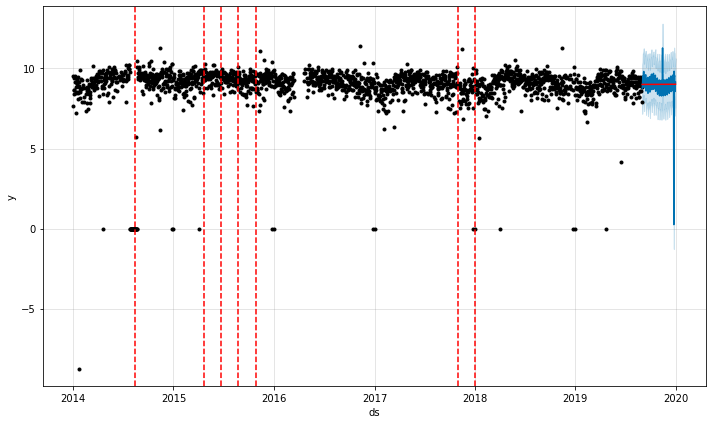

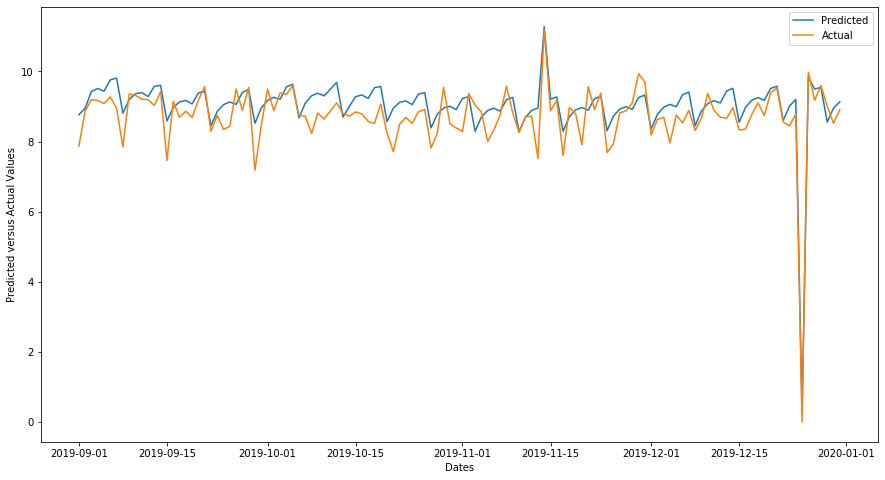

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====yorkton=====
RMSE loss for yorkton = 0.817


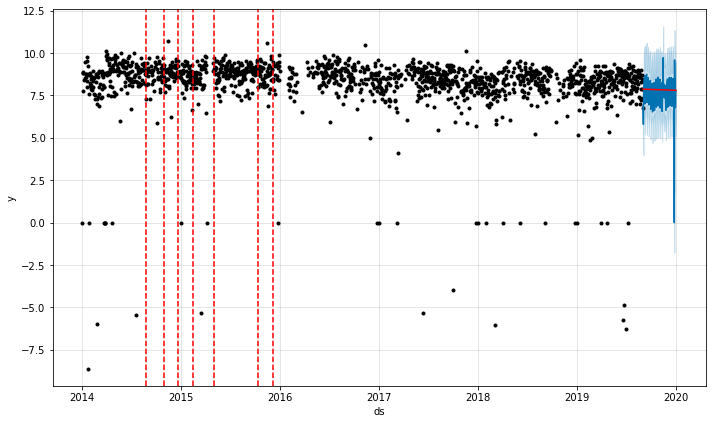

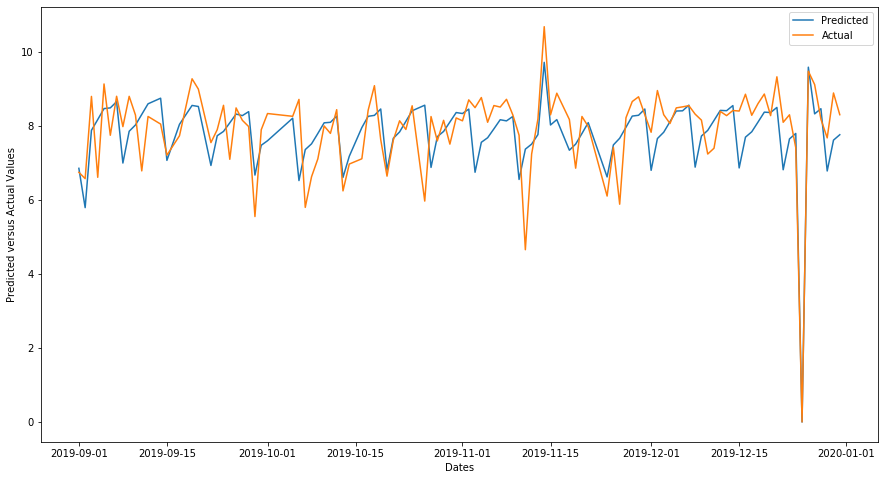

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====cranbrook=====
RMSE loss for cranbrook = 0.725


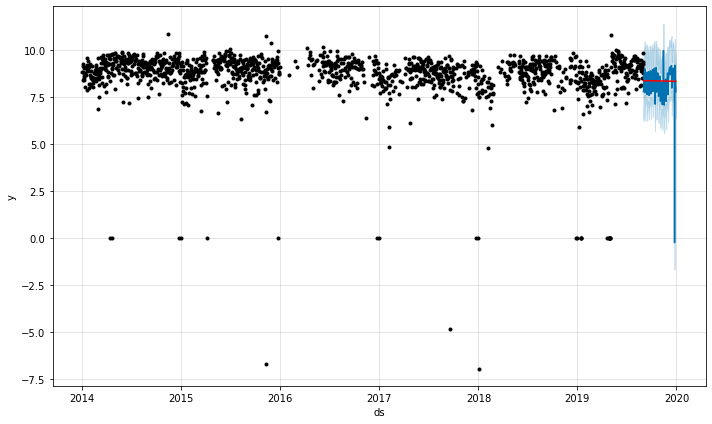

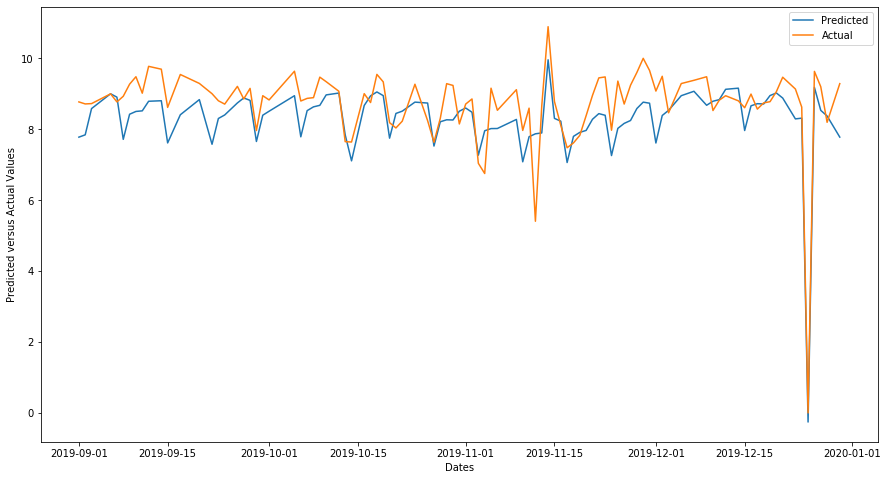

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====fort st john=====
RMSE loss for fort st john = 0.696


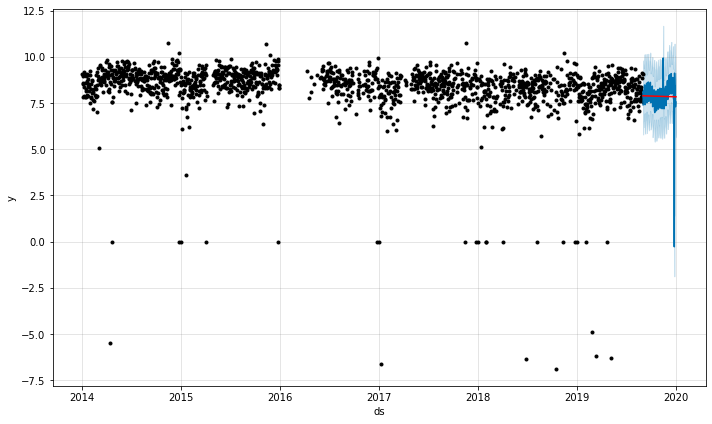

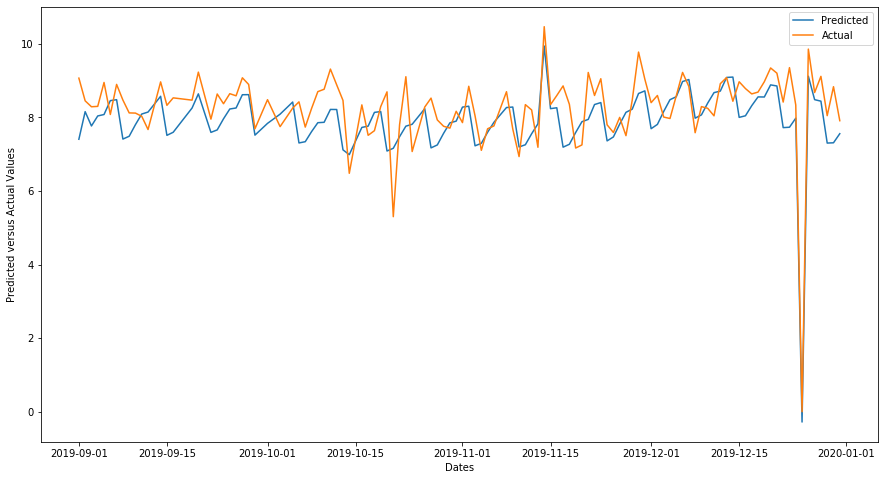

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====kamloops=====
RMSE loss for kamloops = 0.358


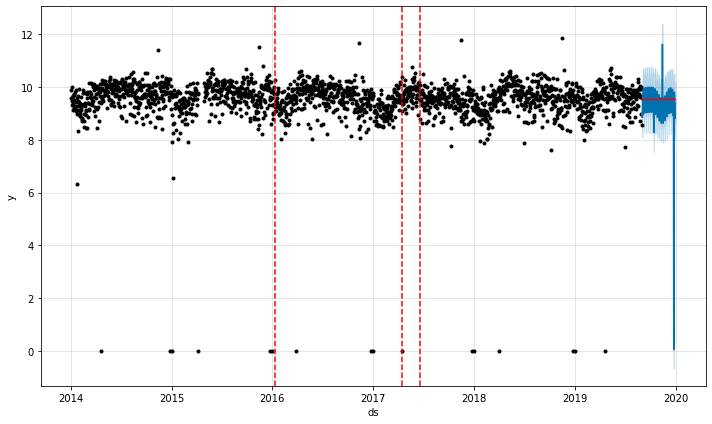

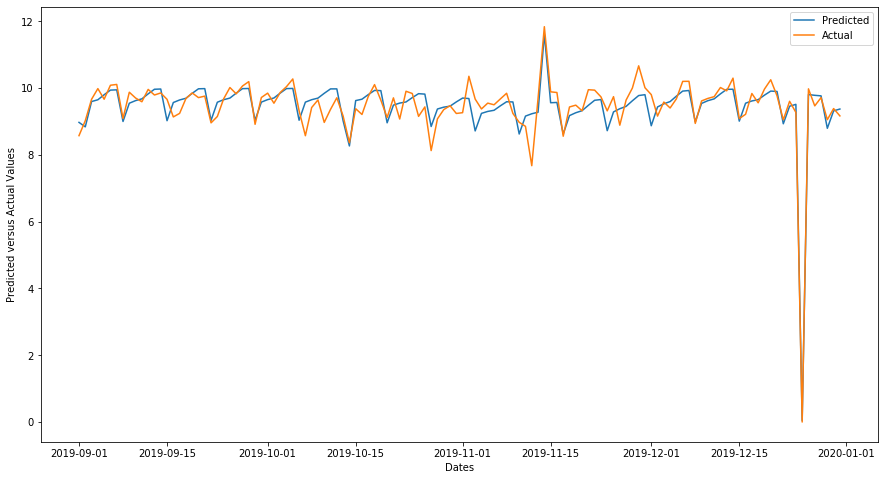

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====kelowna=====
RMSE loss for kelowna = 0.393


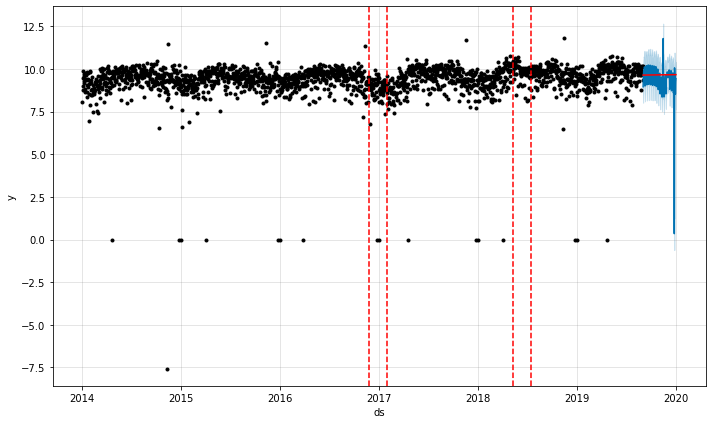

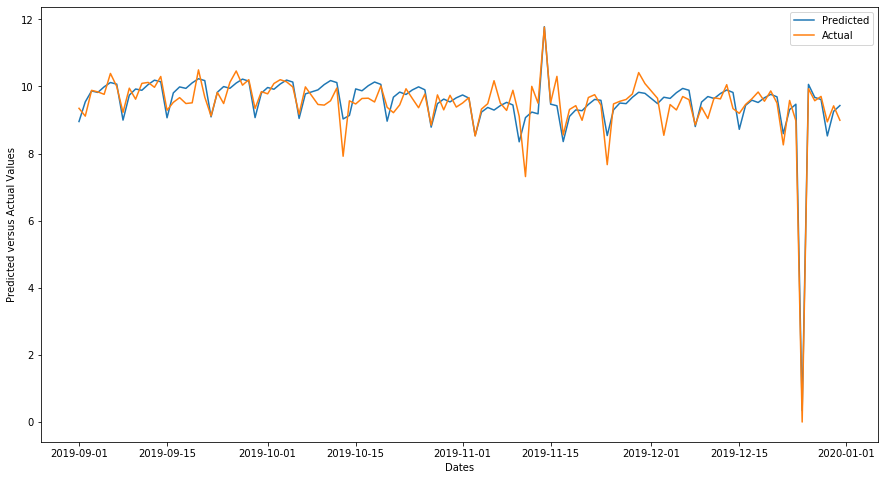

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====calgary=====
RMSE loss for calgary = 0.364


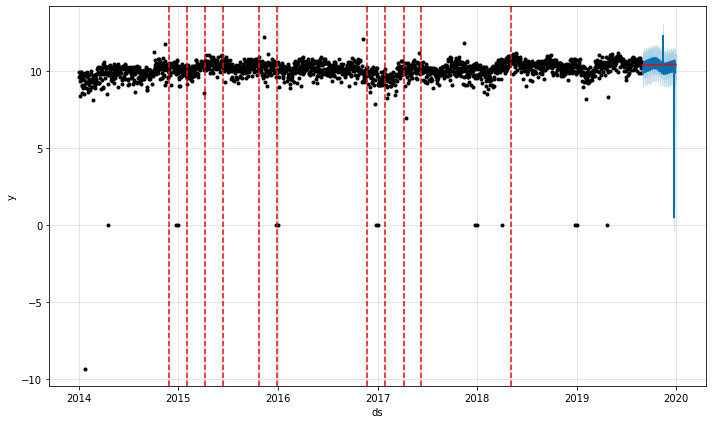

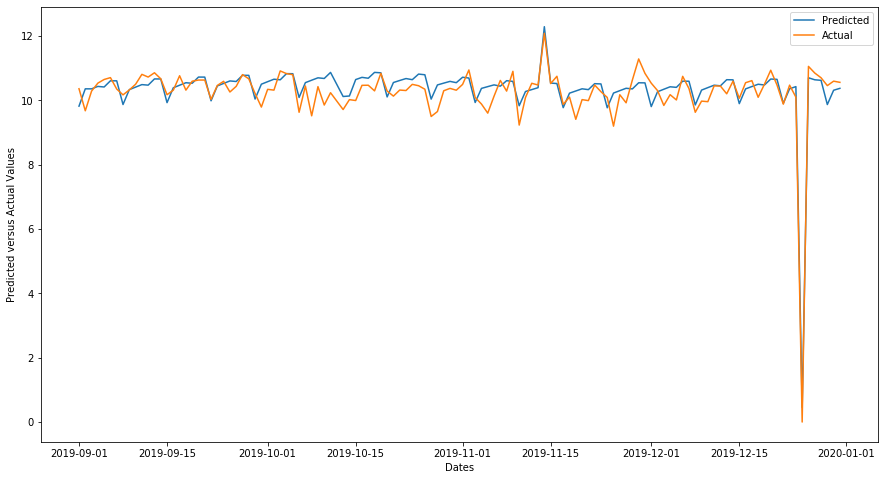

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====penticton=====
RMSE loss for penticton = 0.441


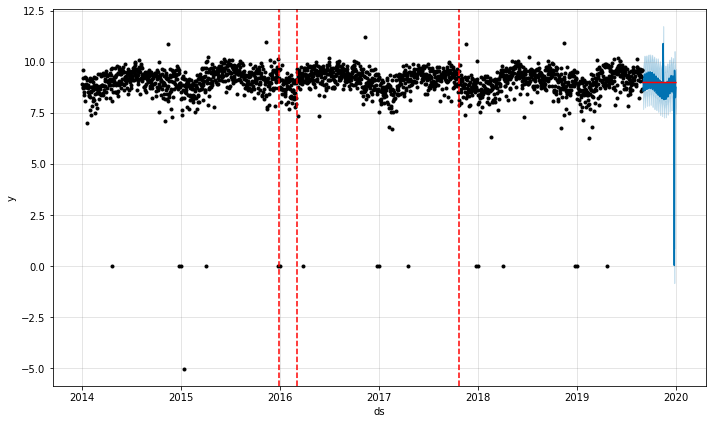

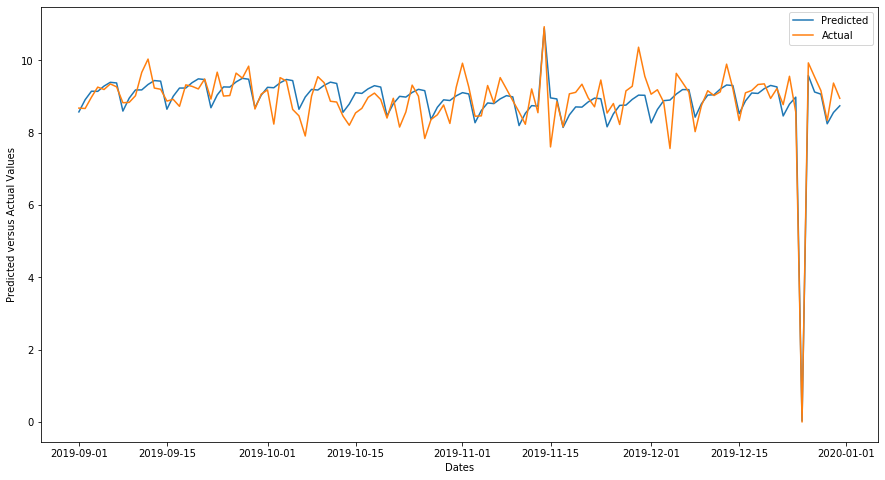

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====port alberni=====
RMSE loss for port alberni = 1.141


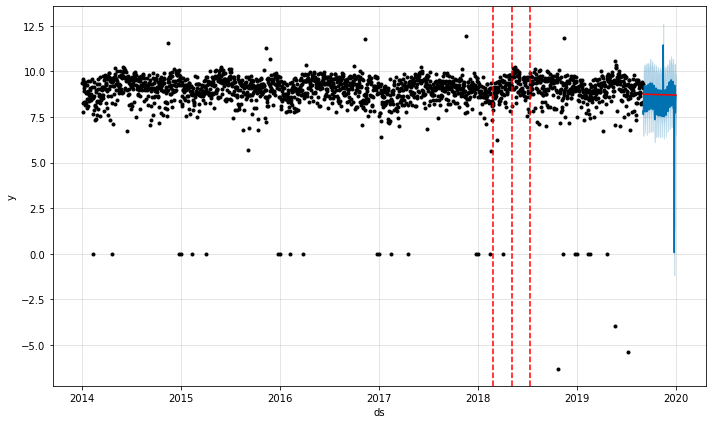

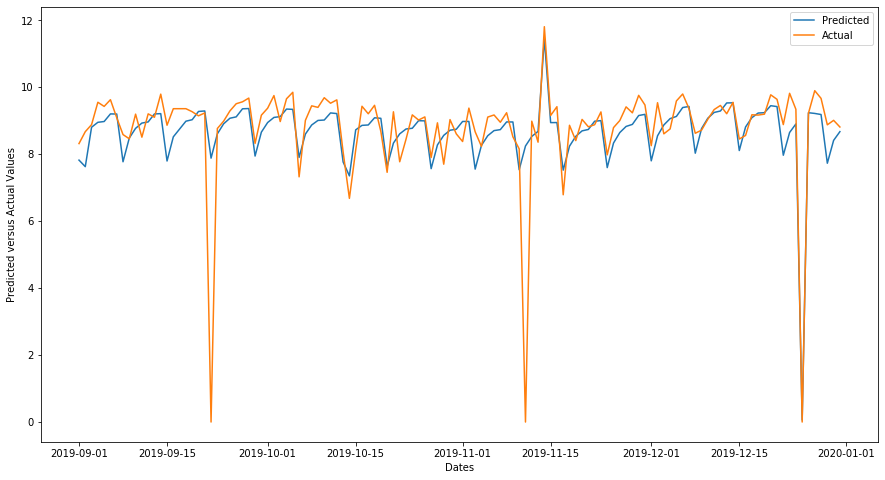

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====quesnel=====
RMSE loss for quesnel = 0.923


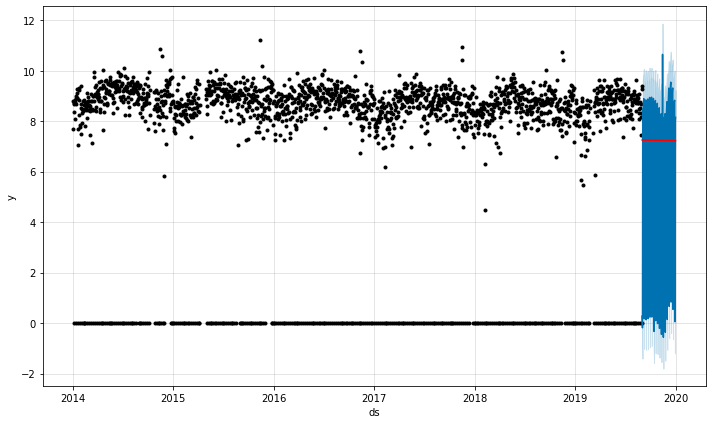

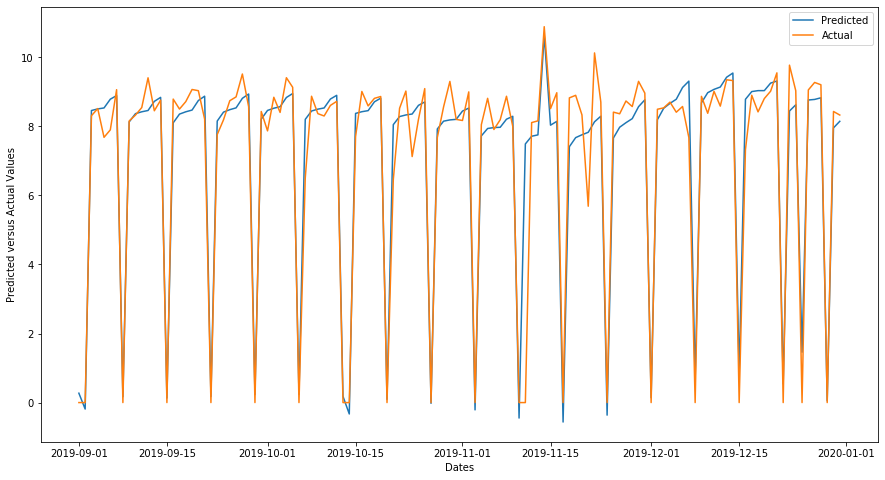

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====salmon arm=====
RMSE loss for salmon arm = 0.517


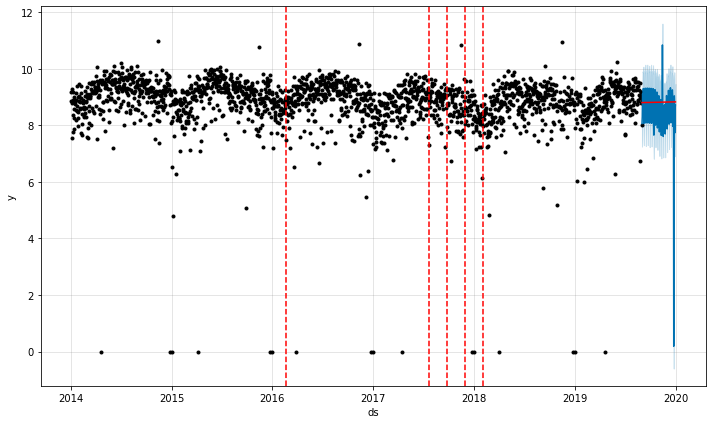

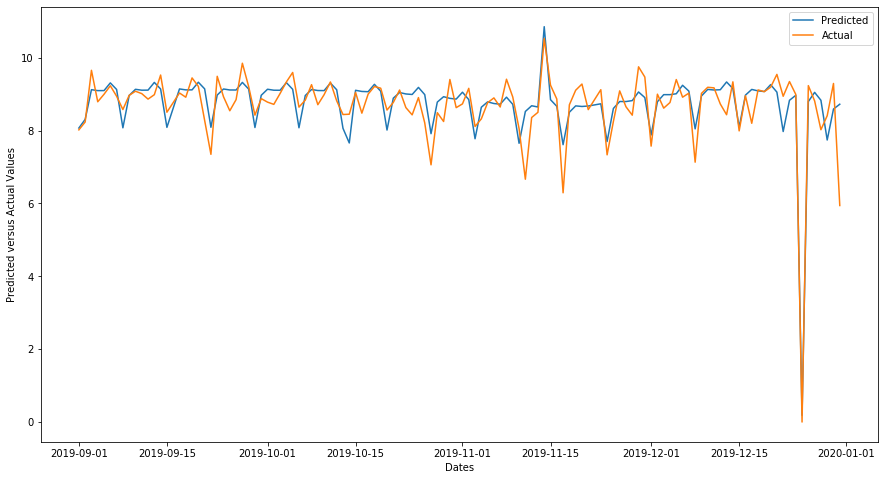

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====trail=====
RMSE loss for trail = 0.444


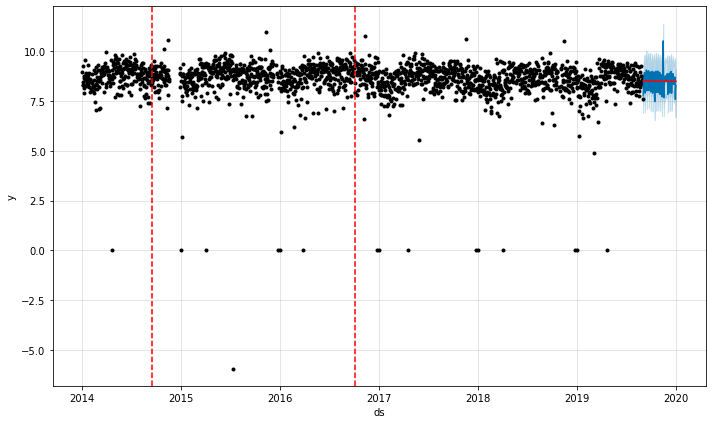

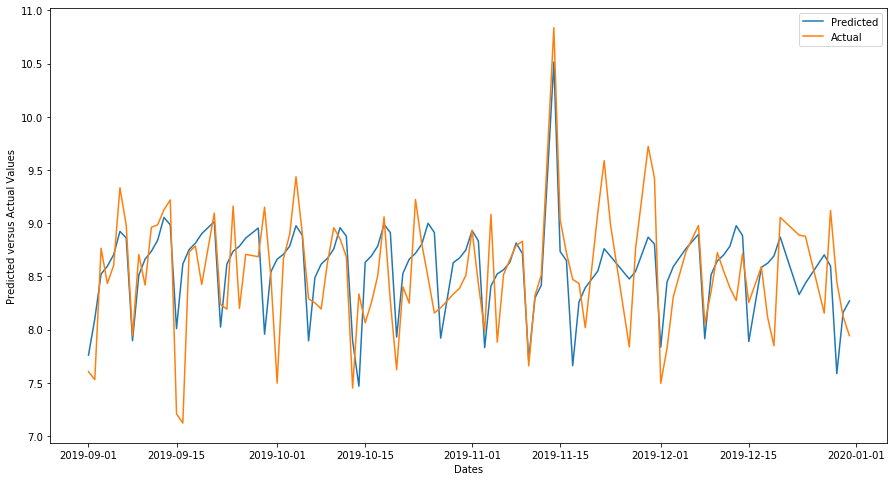

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====vernon=====
RMSE loss for vernon = 0.631


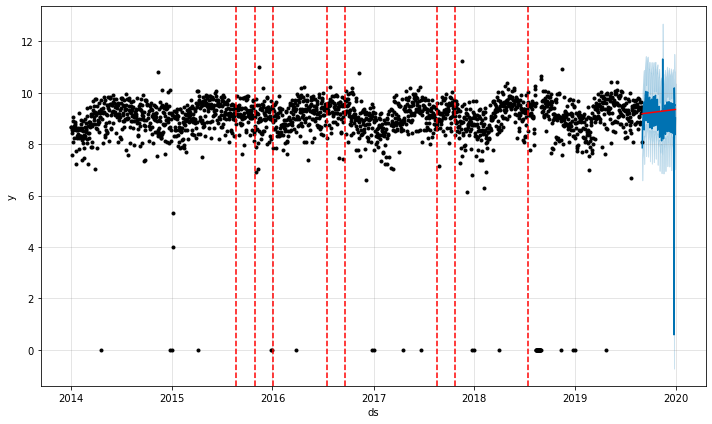

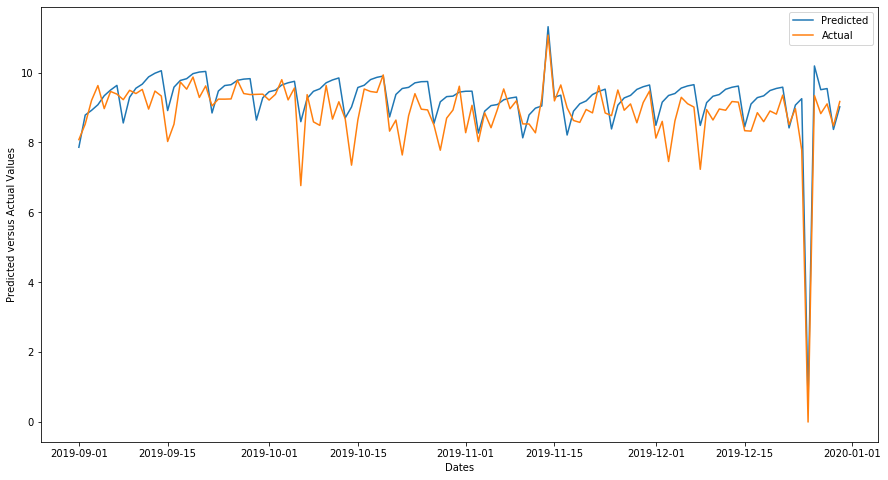

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====white rock=====
RMSE loss for white rock = 0.289


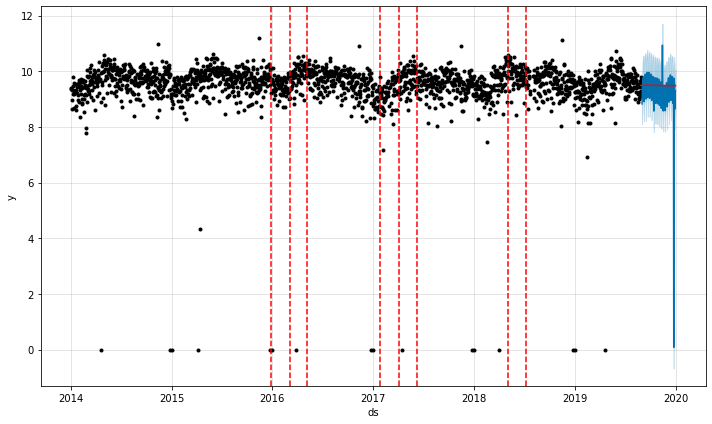

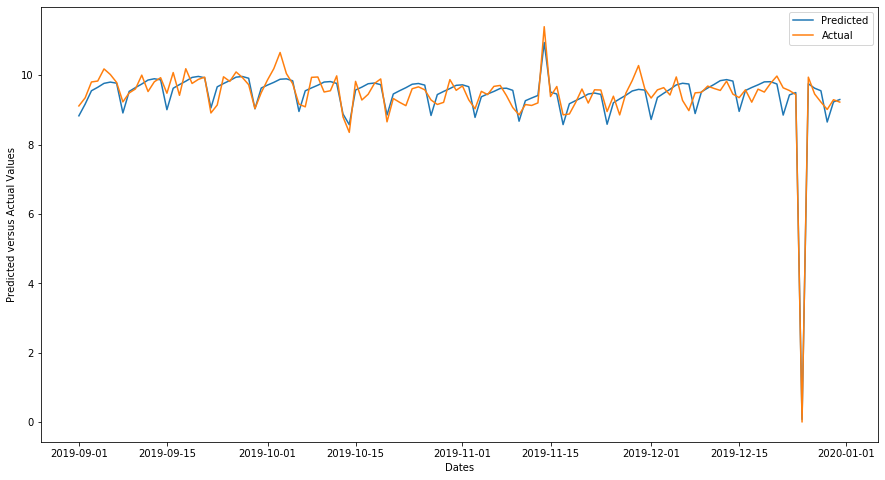

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====williams lake=====
RMSE loss for williams lake = 0.982


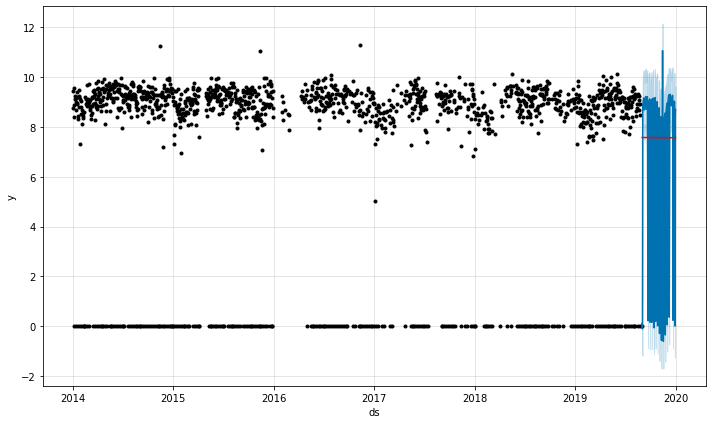

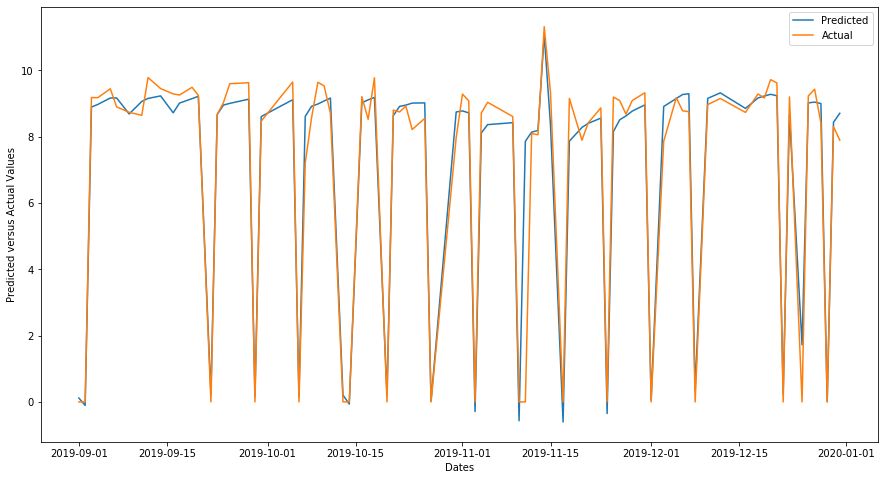

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====regina=====
RMSE loss for regina = 0.314


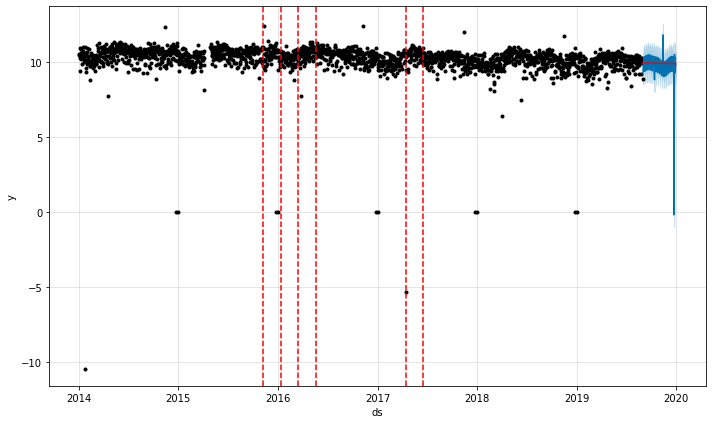

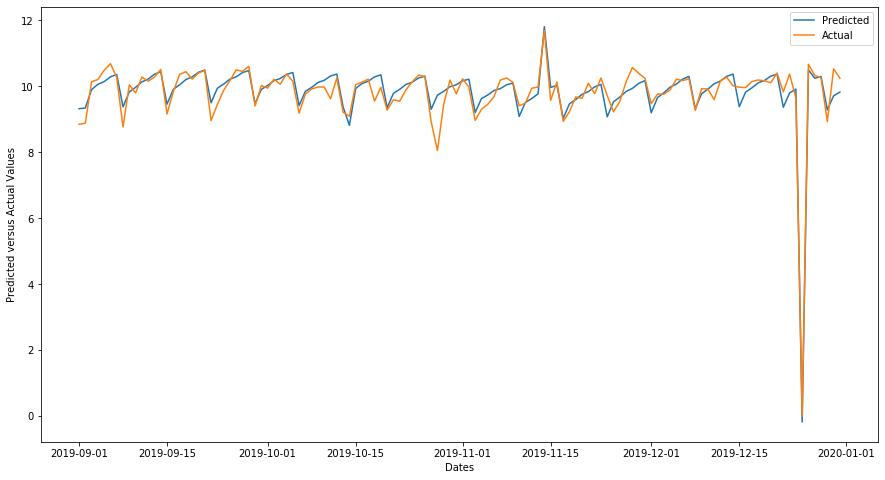

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====saskatoon=====
RMSE loss for saskatoon = 0.328


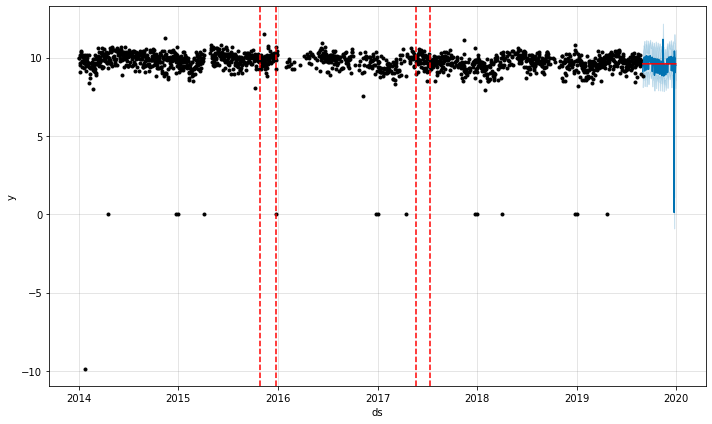

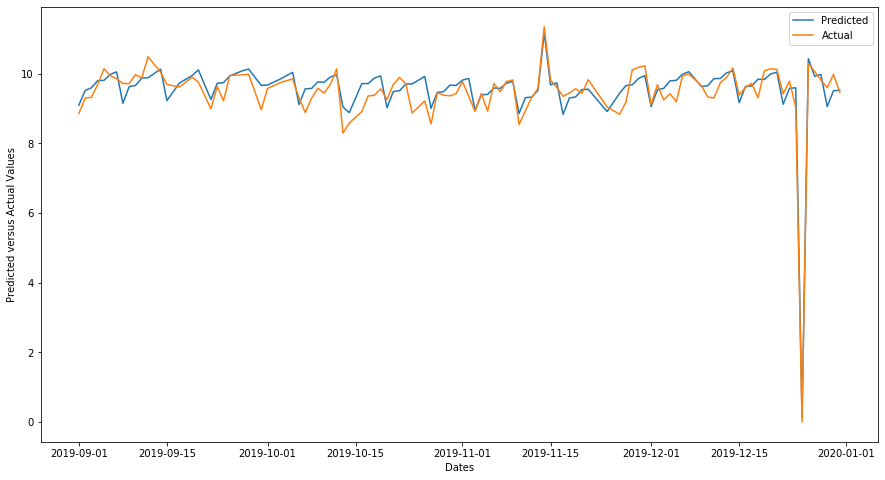

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====swift current=====
RMSE loss for swift current = 1.119


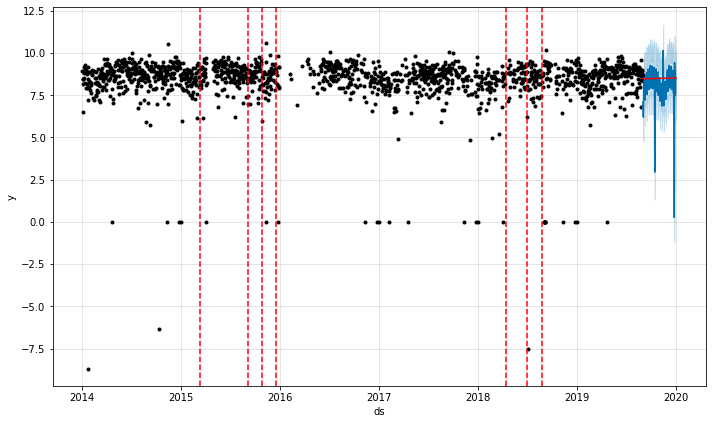

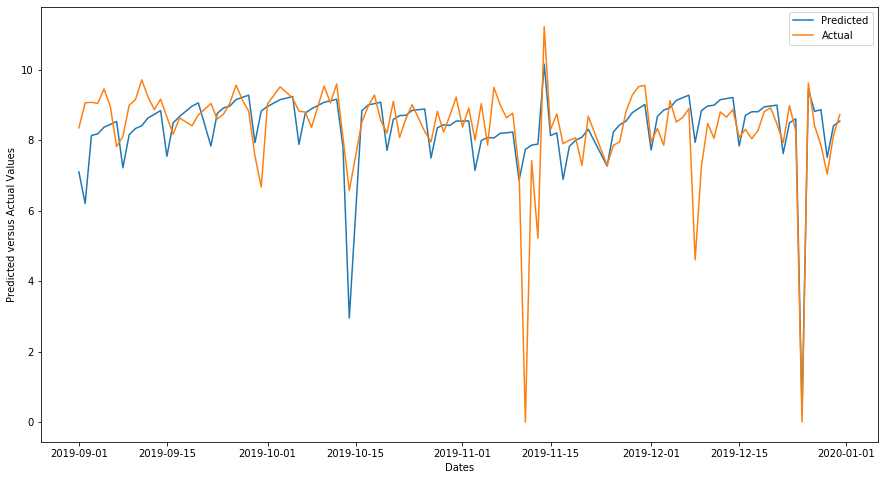

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====wainwright=====
RMSE loss for wainwright = 0.923


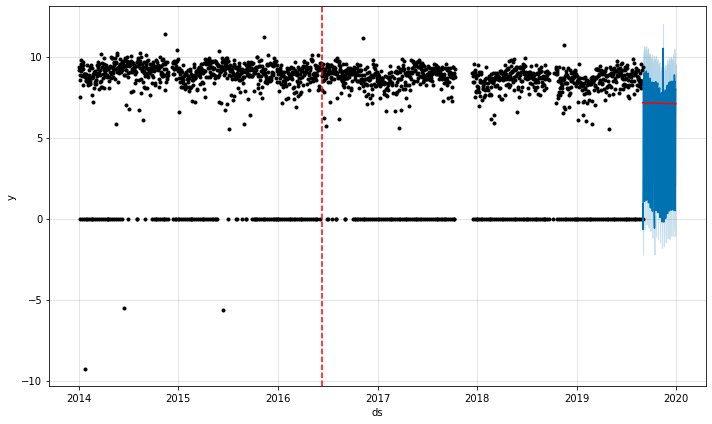

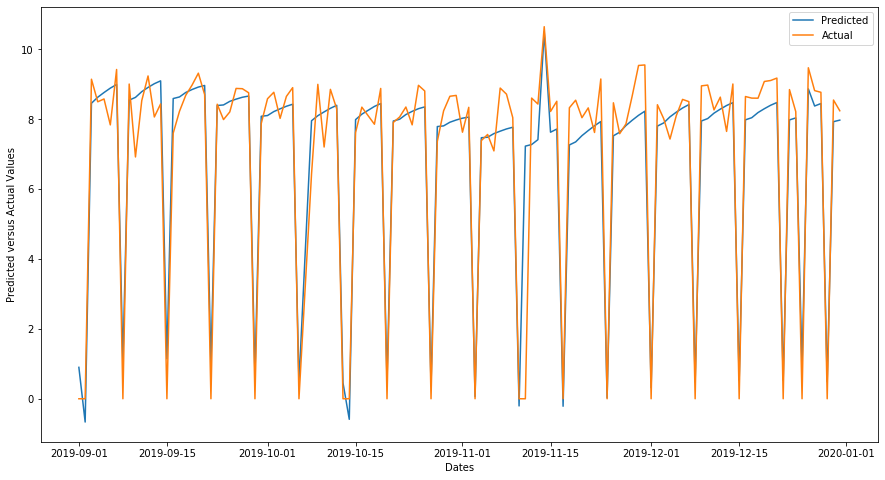

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====stettler=====
RMSE loss for stettler = 1.353


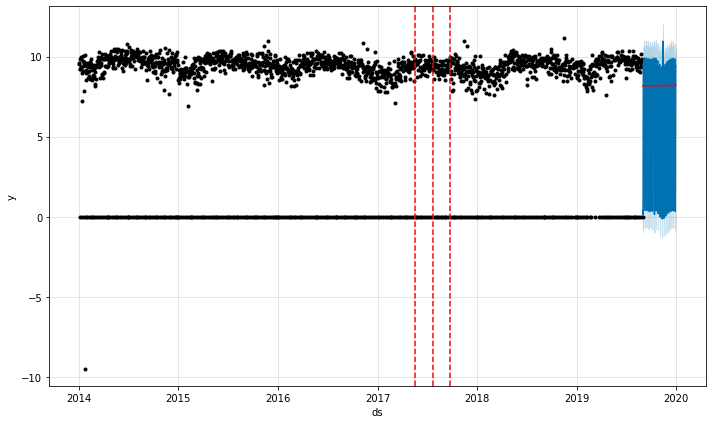

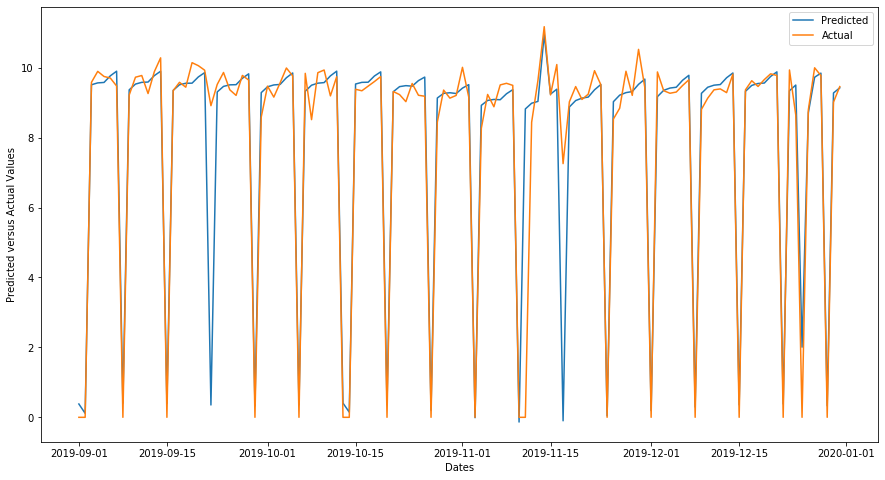

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


=====nelson=====


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


No records to test for nelson city
=====edmonton=====
RMSE loss for edmonton = 0.577


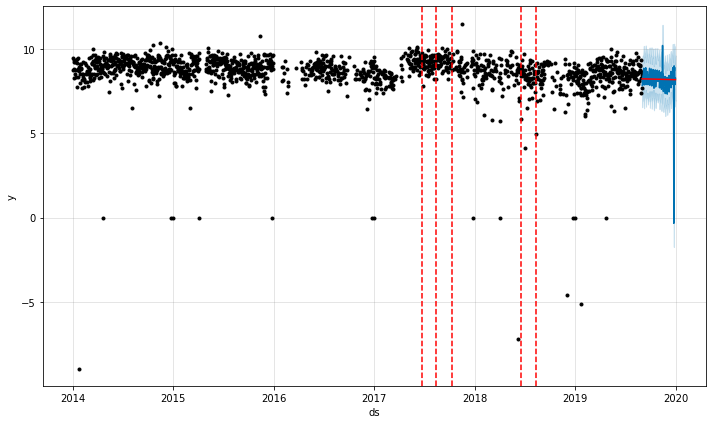

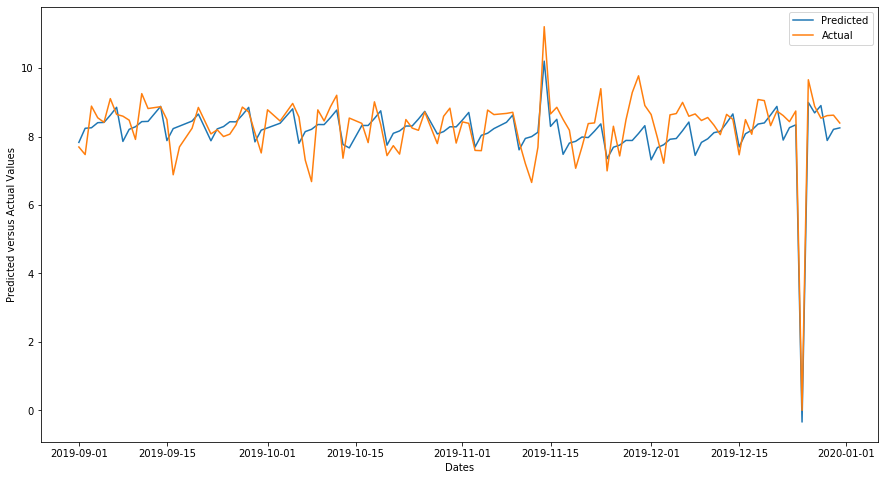

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====olds=====
RMSE loss for olds = 0.909


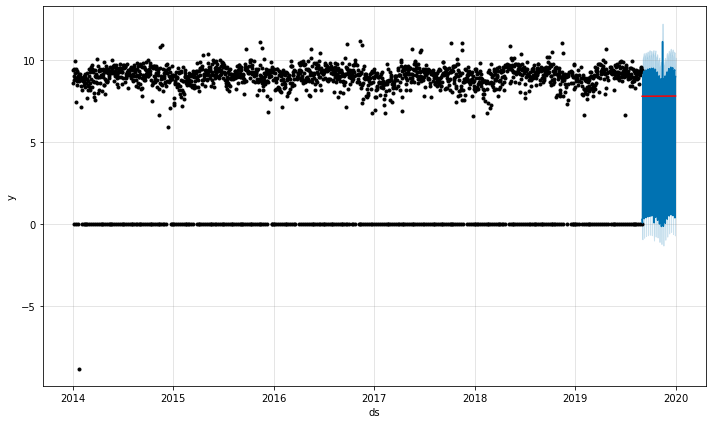

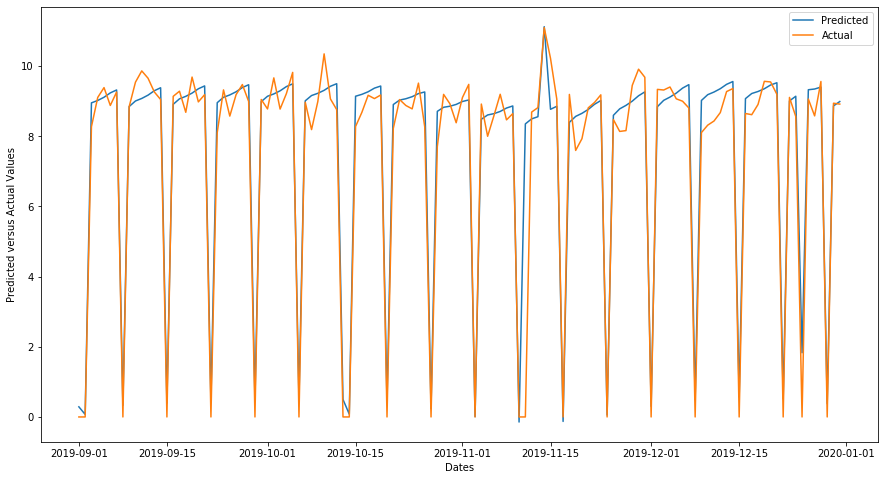

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====red deer=====
RMSE loss for red deer = 1.407


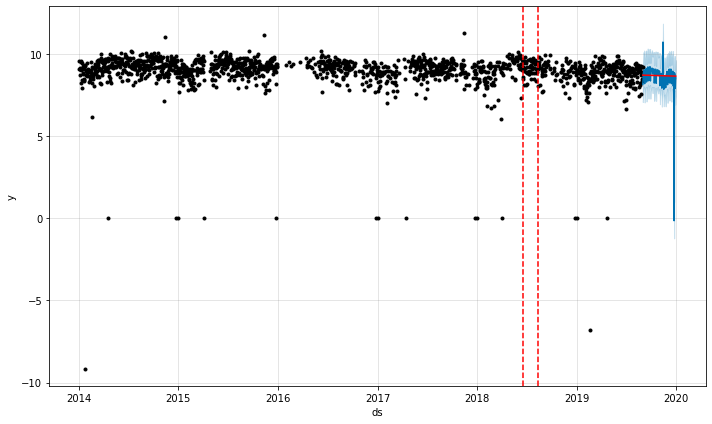

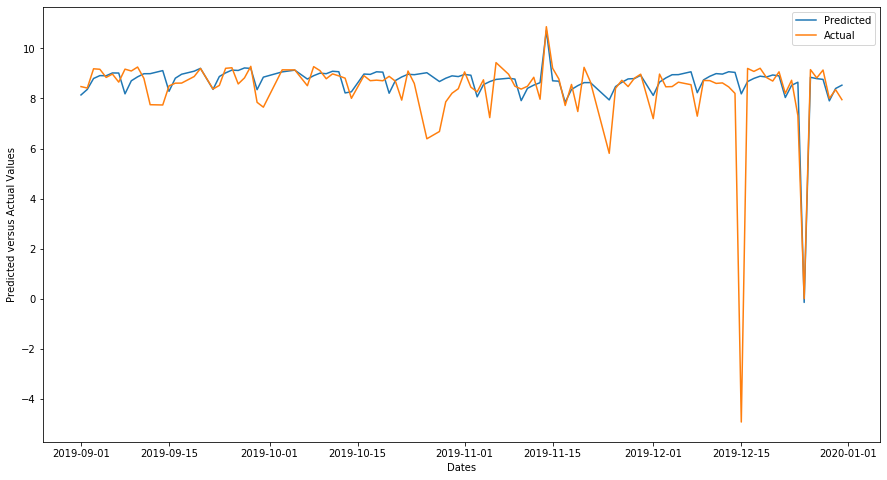

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====camrose=====
RMSE loss for camrose = 0.881


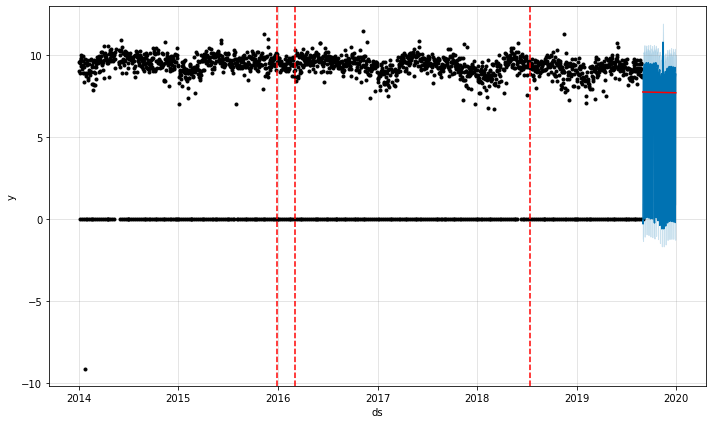

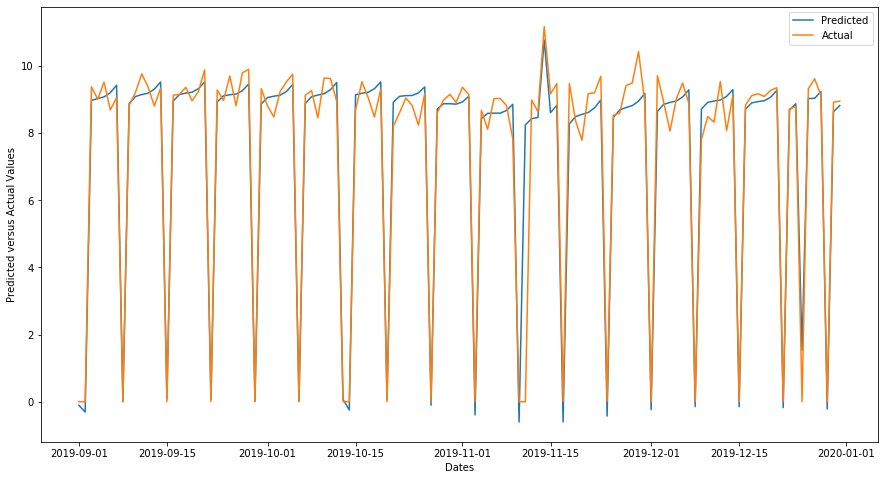

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====lethbridge=====
RMSE loss for lethbridge = 1.174


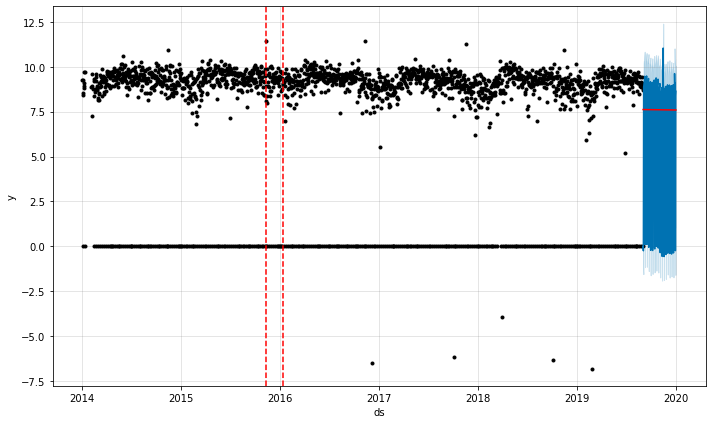

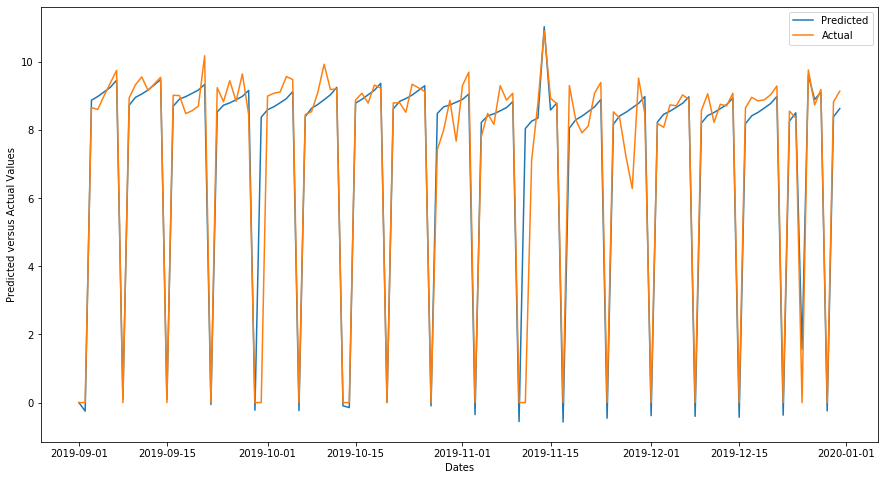

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====terrace=====
RMSE loss for terrace = 0.699


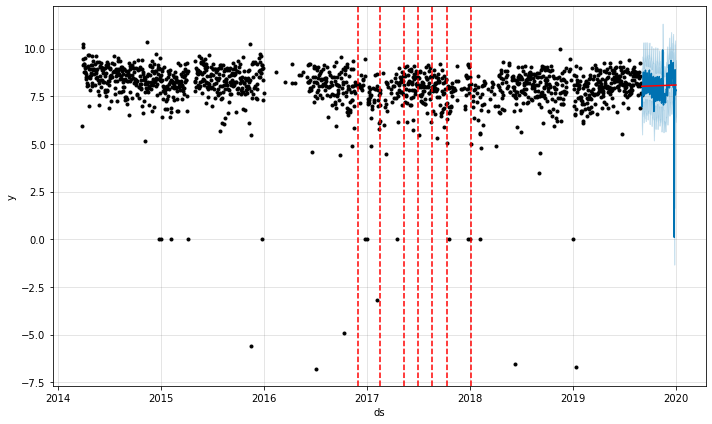

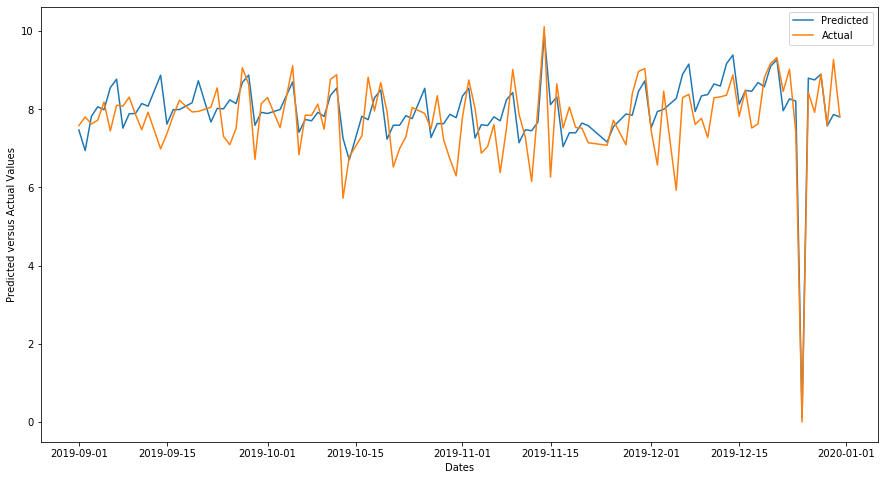

Overall Model Performance = 0.728


In [7]:
# load retail sales data
tr_data = load_data(datapath['train_data'], 'csv')
te_data = load_data(datapath['test_data'], 'csv')

cities = tr_data['city'].str.lower().unique()
losses = []

for city in cities:
    print("=====%s=====" %(city))
    train = tr_data.loc[tr_data['city']==city]
    test = te_data.loc[te_data['city']==city]
    
    filename = city.replace(' ','_')
    path = "model/sales/"+filename+".pkl"
    
    # preprocessing
    train_df = preprocess(train)
    test_df = preprocess(test)
    
    # train the prophet
    reg = model(train_df)
    save_model(reg, path)
    
    # forecast future
    if(test_df.shape[0]):
        future = forecast(reg, test_df)
    
        # evaluate the model performance
        loss = evaluate(future['yhat'], test_df['y'])
        losses.append(loss)
        print("RMSE loss for %s = %.3f" % (city, loss))

        prophet_plot = reg.plot(future)
        add_changepoints_to_plot(prophet_plot.gca(), reg, future)
        
        # plot performance - predicted versus actual
        fig = plot_error(test_df['ds'], future['yhat'], test_df['y'])
        fig.show()
    else:
        print("No records to test for %s city" %(city))
        
# overall model performance for all cities
avg_loss = np.array(losses).mean()
print("Overall Model Performance = %.3f" %(avg_loss))

### Modelling Total Sales with Weather

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====medicine hat=====
RMSE loss for medicine hat = 0.484


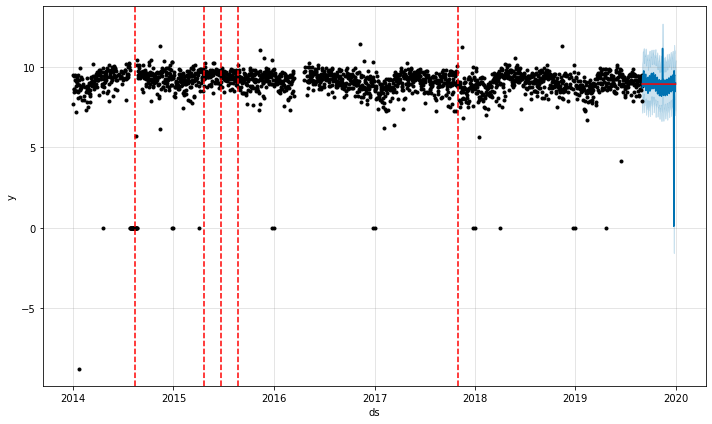

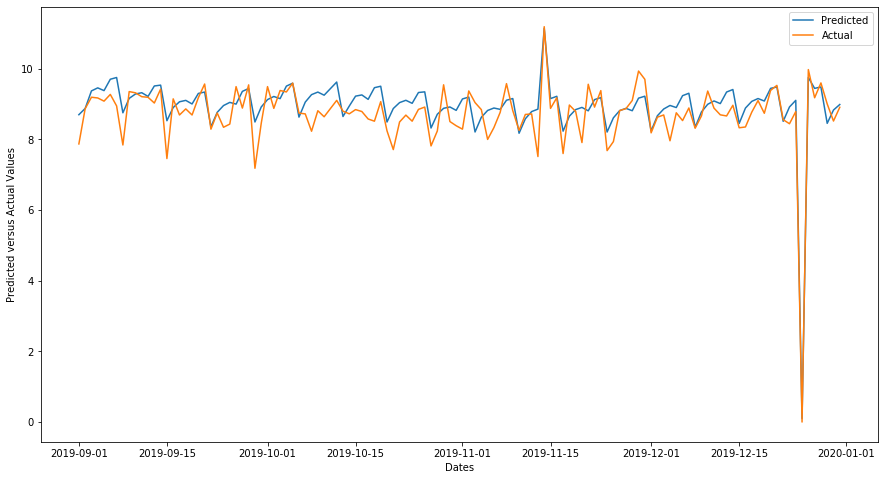

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====yorkton=====
RMSE loss for yorkton = 0.813


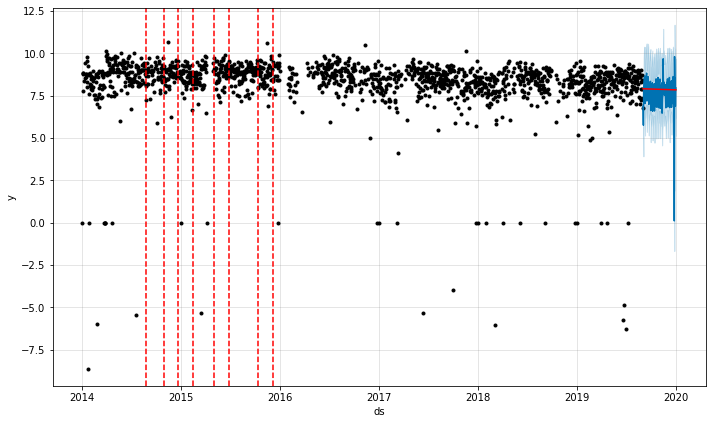

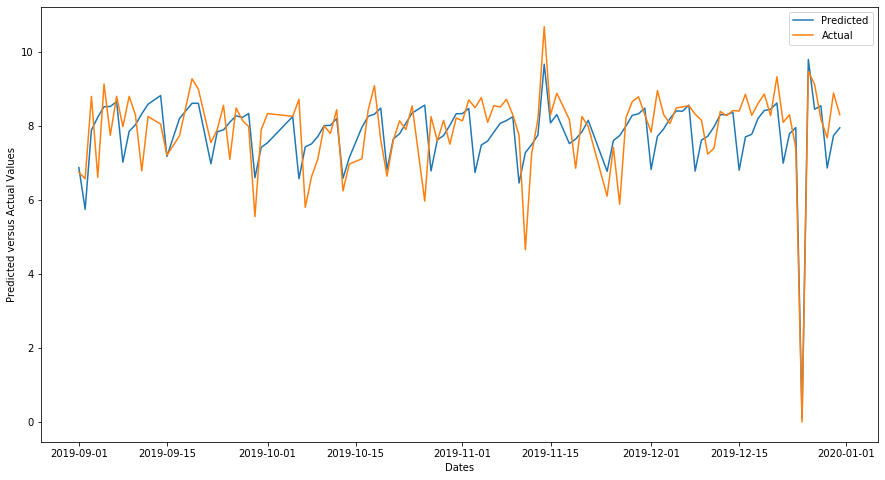

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====cranbrook=====
RMSE loss for cranbrook = 0.727


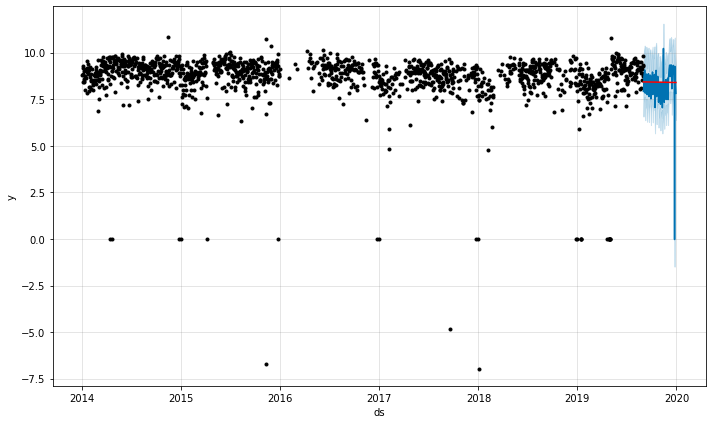

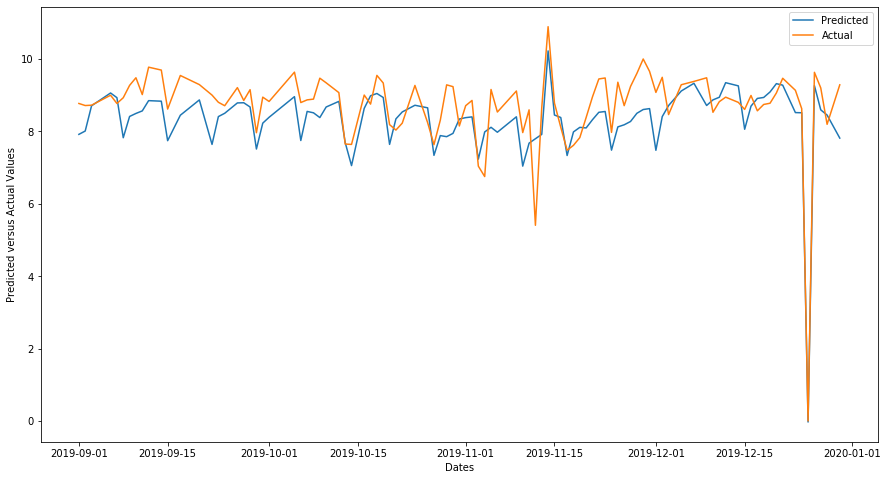

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====fort st john=====
RMSE loss for fort st john = 0.673


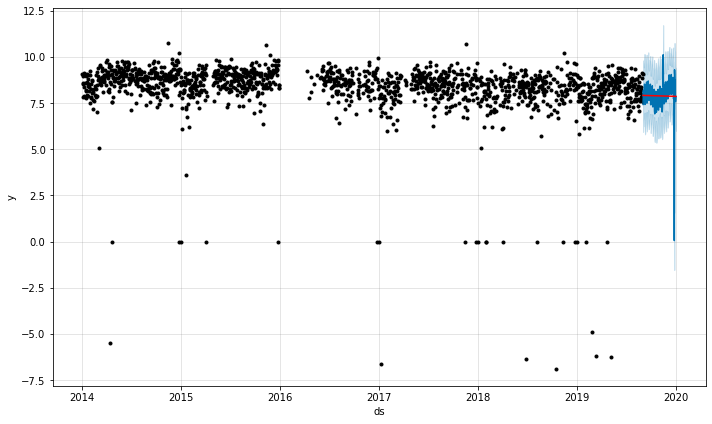

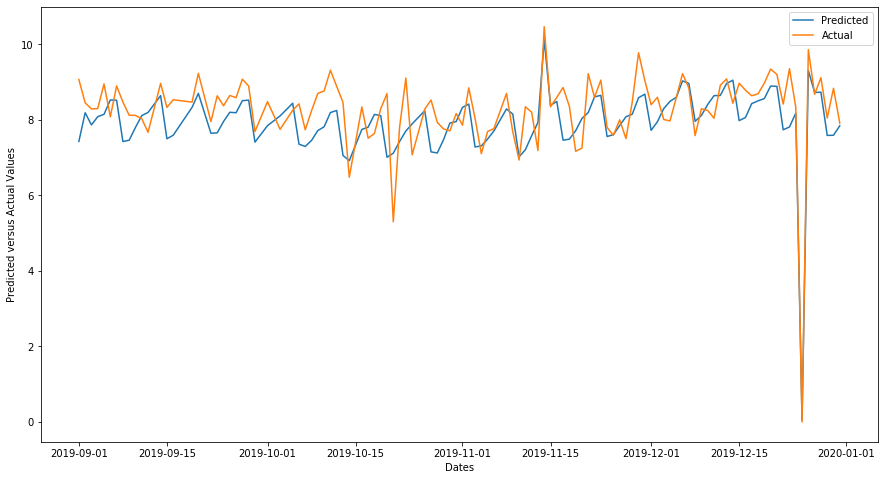

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====kamloops=====
RMSE loss for kamloops = 0.362


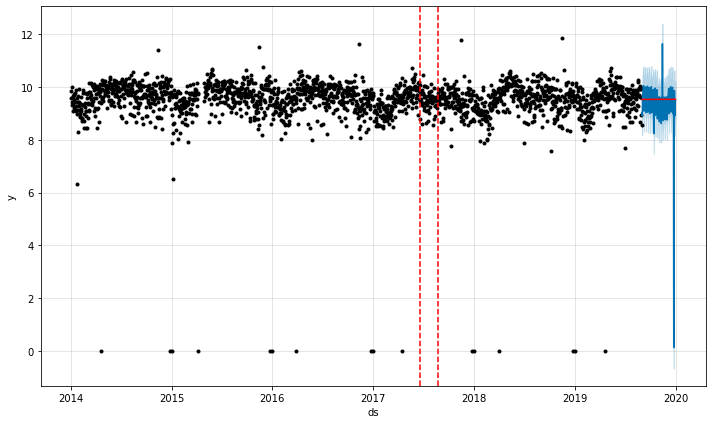

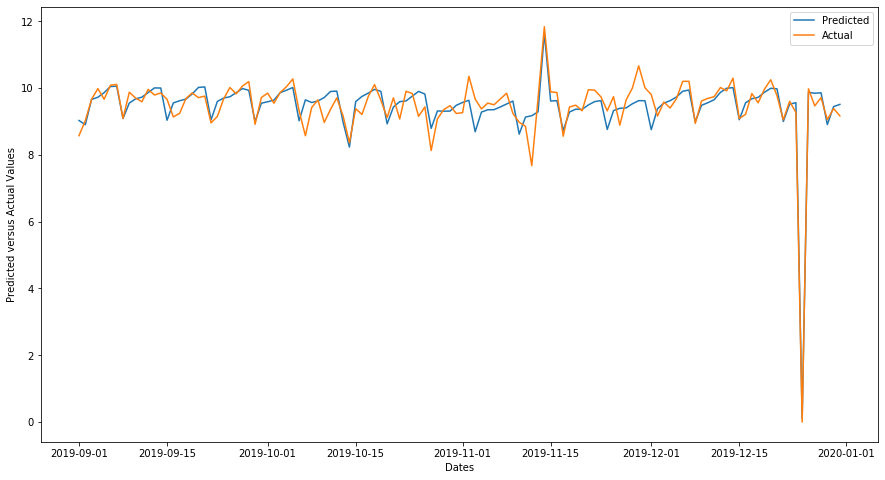

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====kelowna=====
RMSE loss for kelowna = 0.402


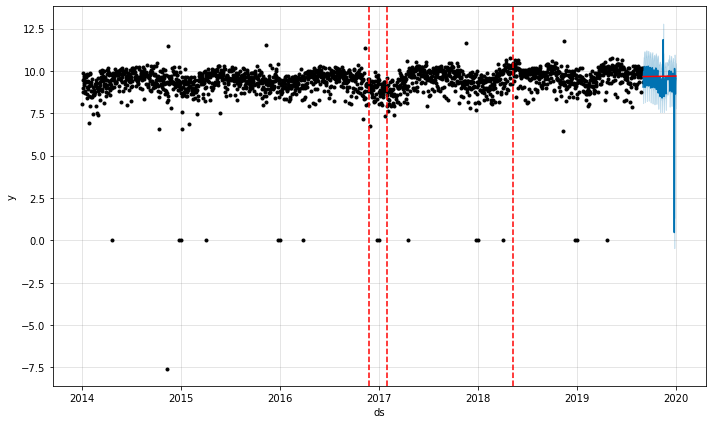

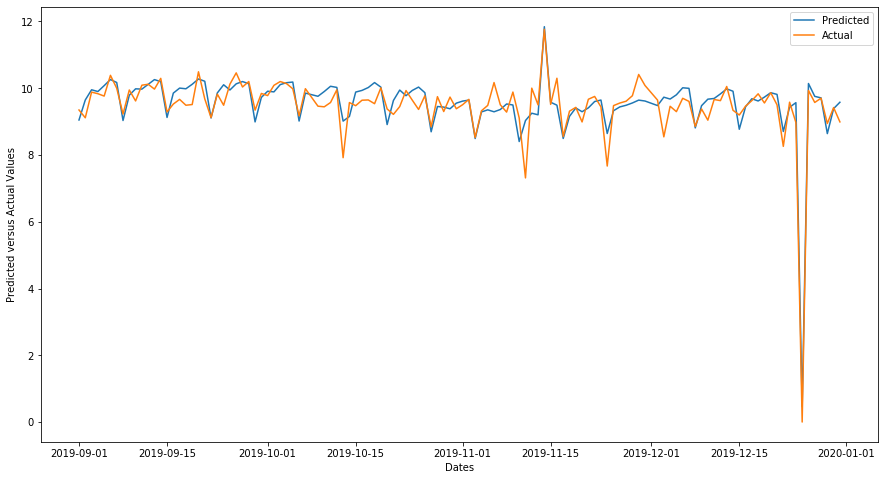

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====calgary=====
RMSE loss for calgary = 0.355


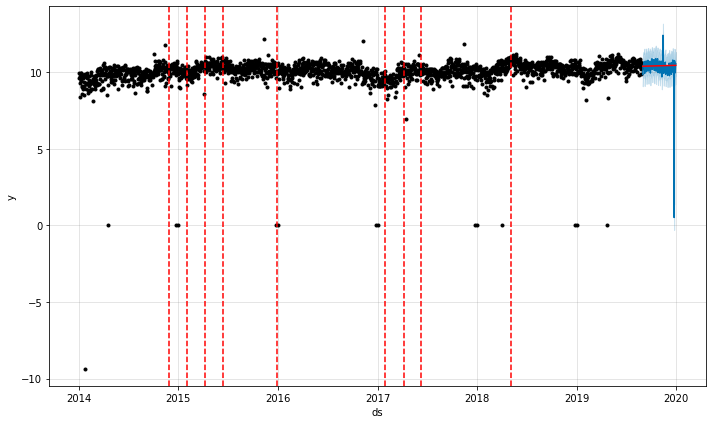

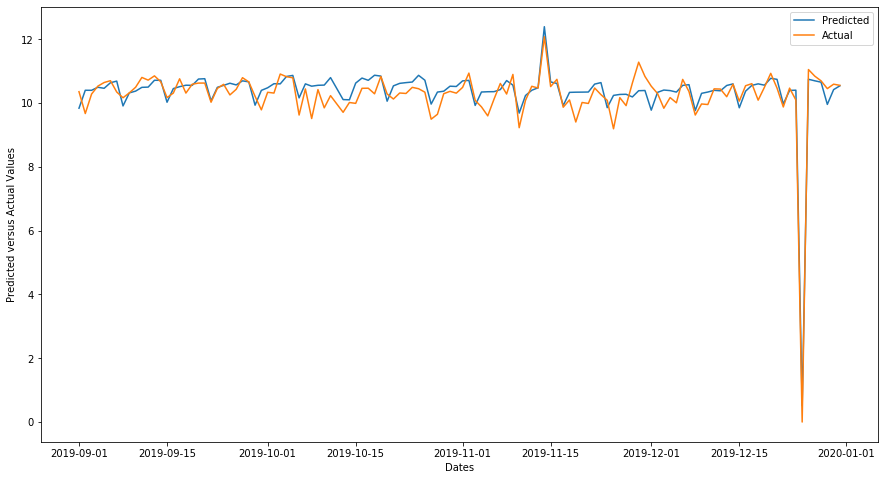

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====penticton=====
RMSE loss for penticton = 0.448


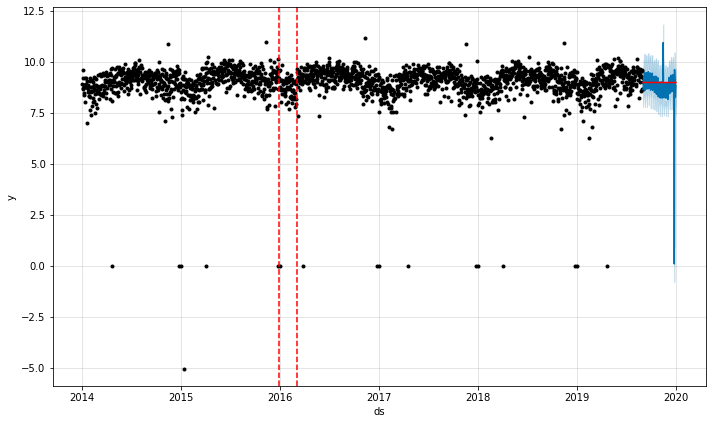

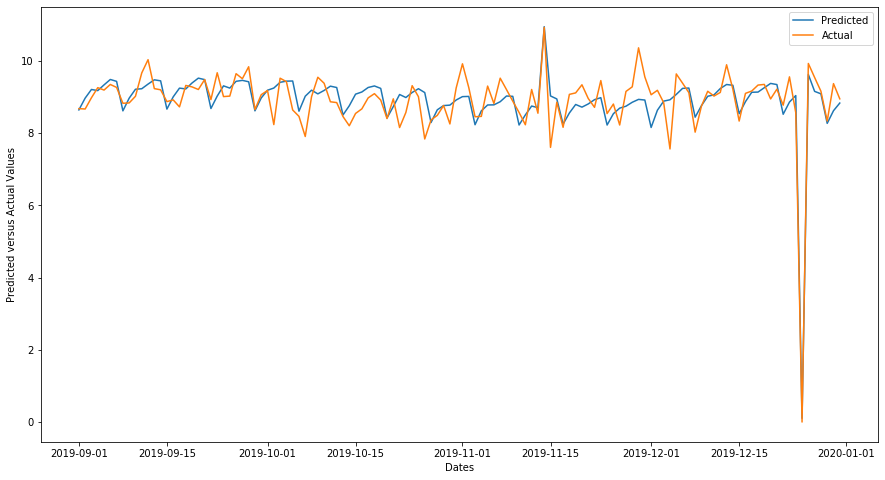

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====port alberni=====
RMSE loss for port alberni = 1.151


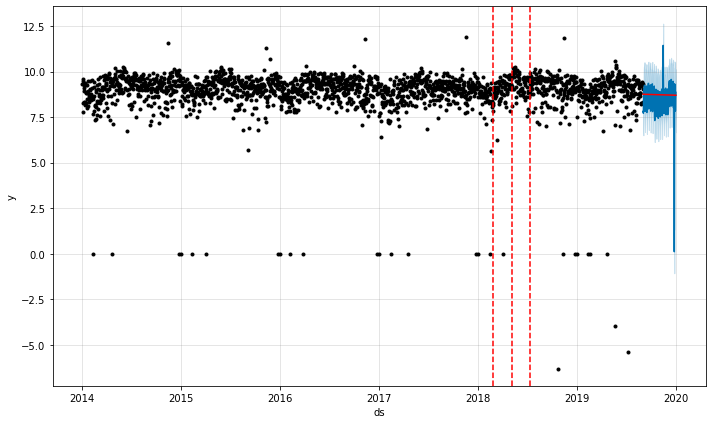

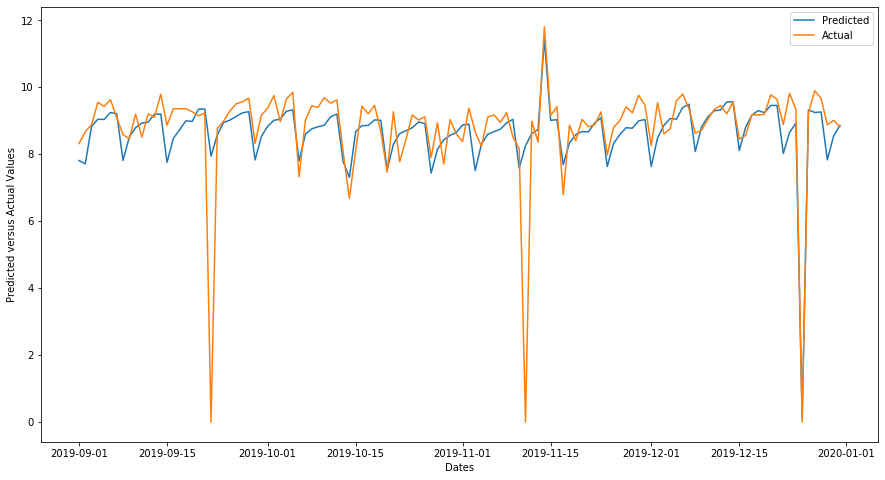

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====quesnel=====
RMSE loss for quesnel = 0.922


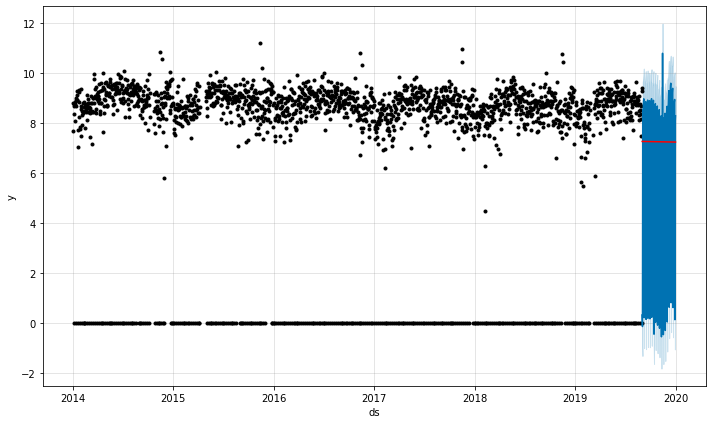

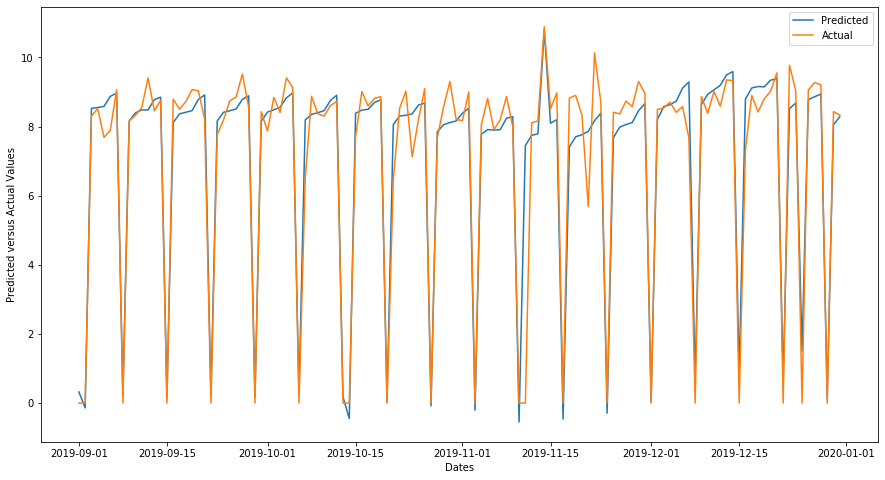

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====salmon arm=====
RMSE loss for salmon arm = 0.523


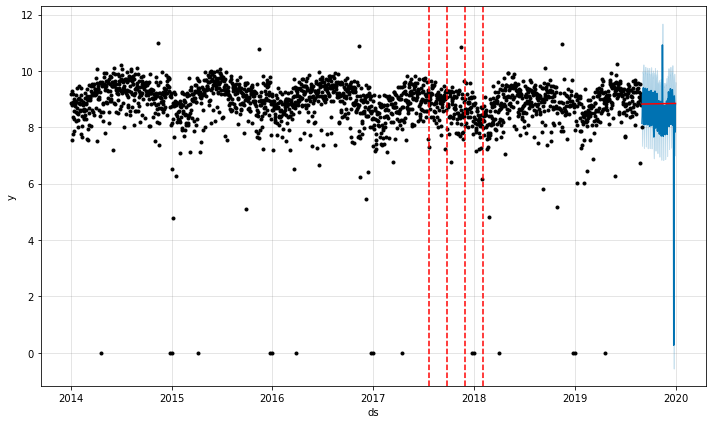

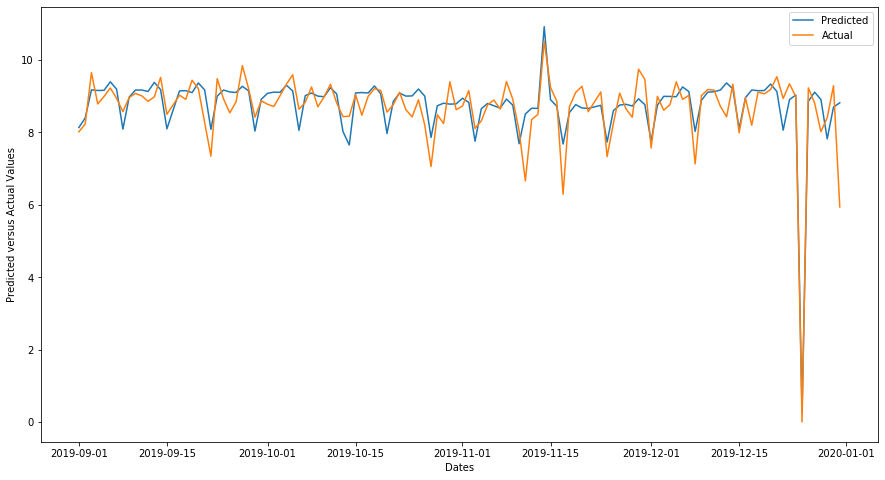

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====trail=====
RMSE loss for trail = 0.444


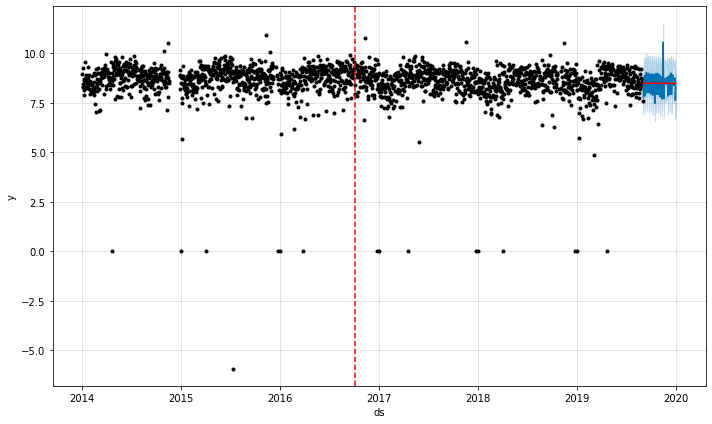

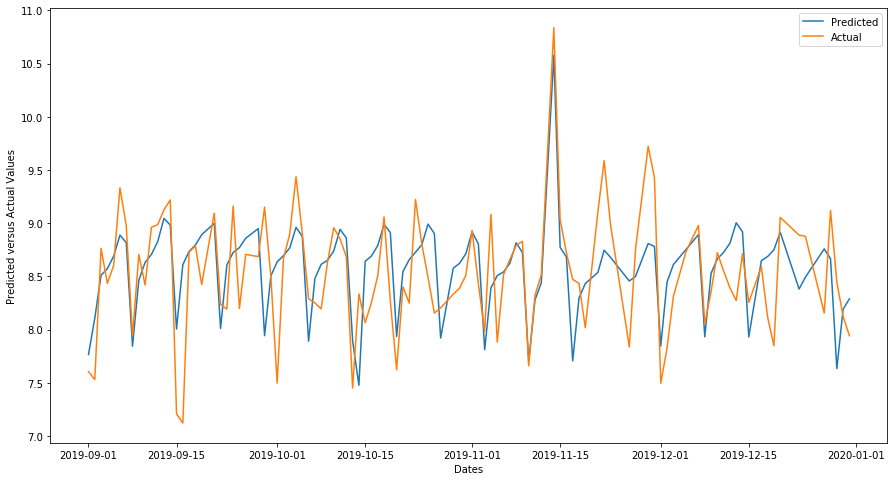

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====vernon=====
RMSE loss for vernon = 0.621


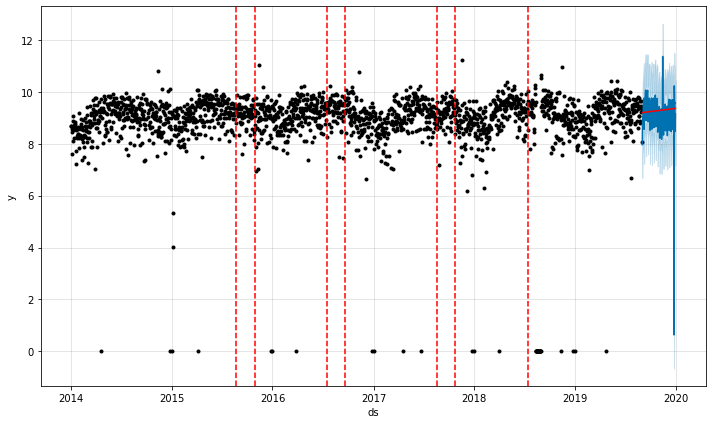

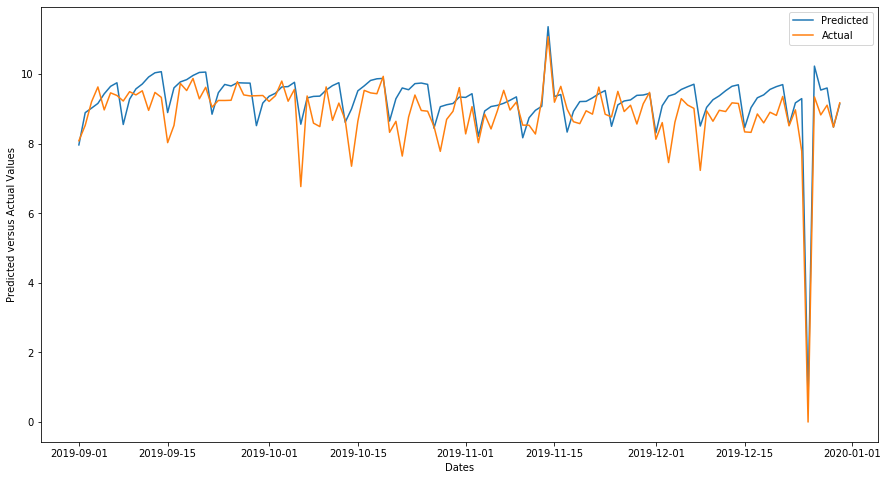

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====white rock=====
RMSE loss for white rock = 0.298


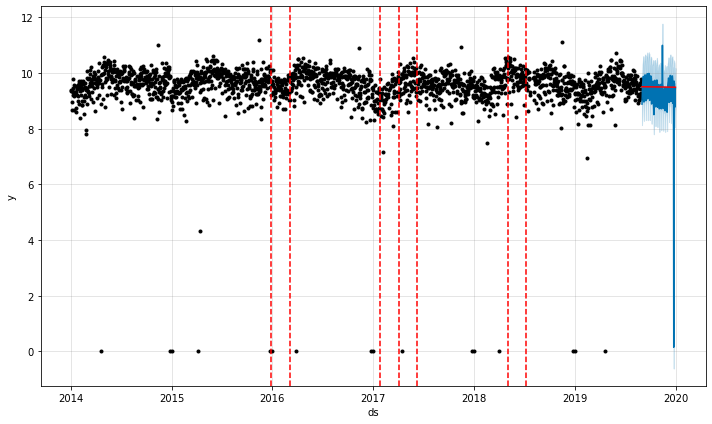

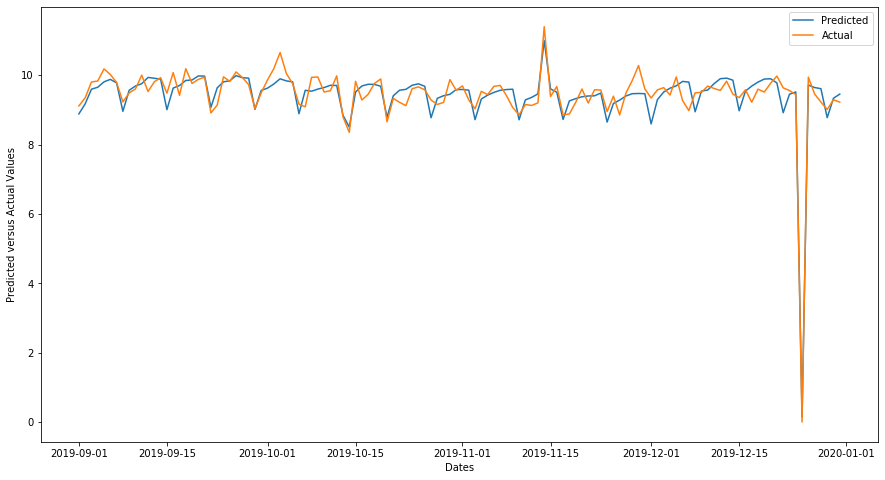

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====williams lake=====
RMSE loss for williams lake = 0.981


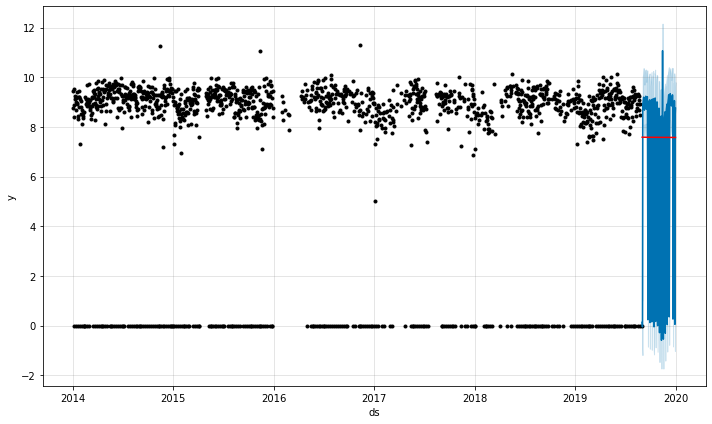

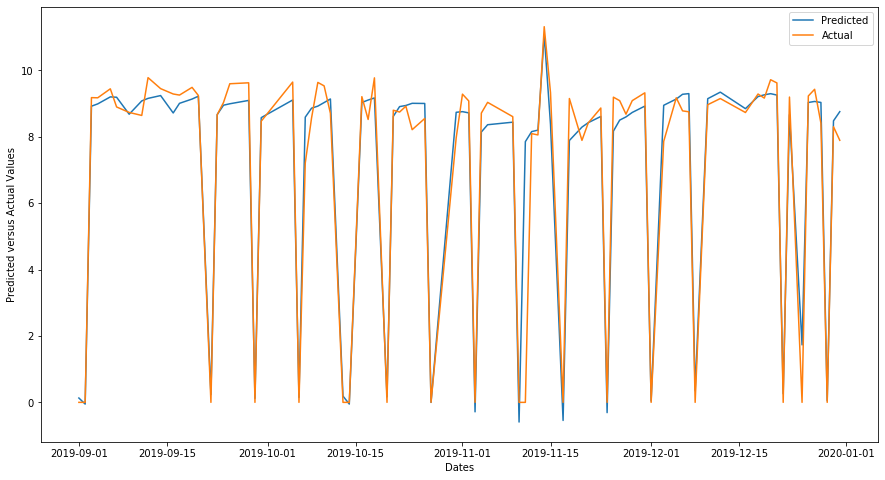

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====regina=====
RMSE loss for regina = 0.306


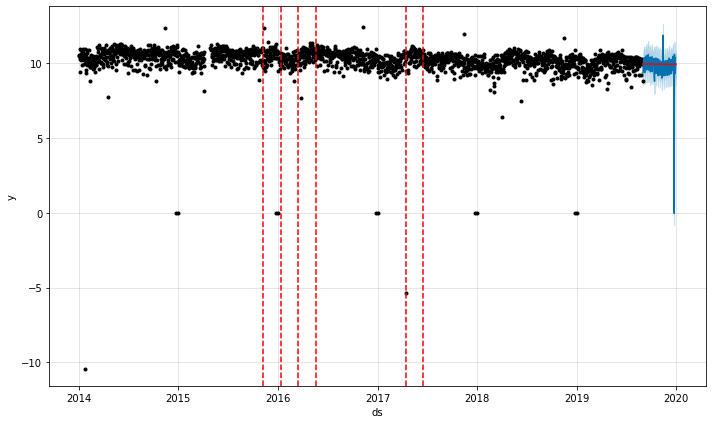

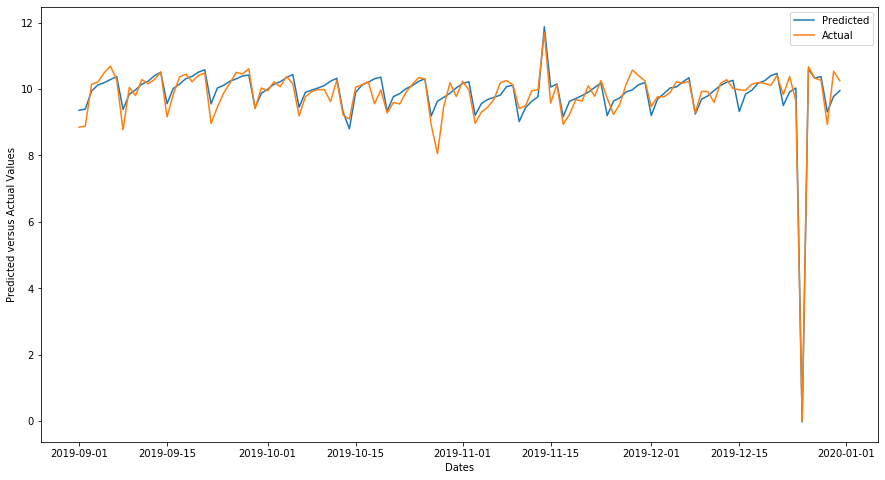

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====saskatoon=====
RMSE loss for saskatoon = 0.323


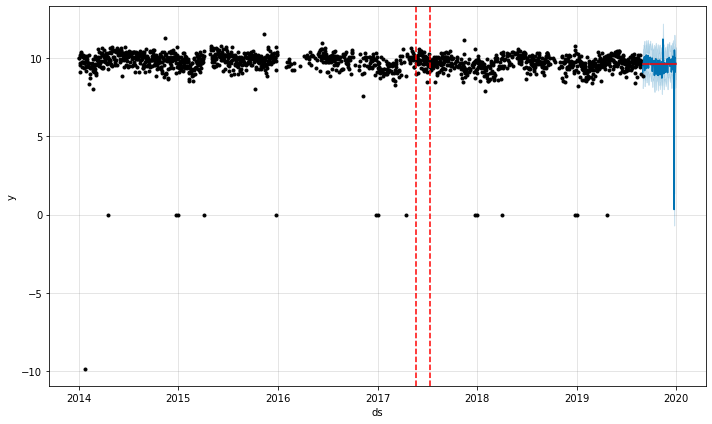

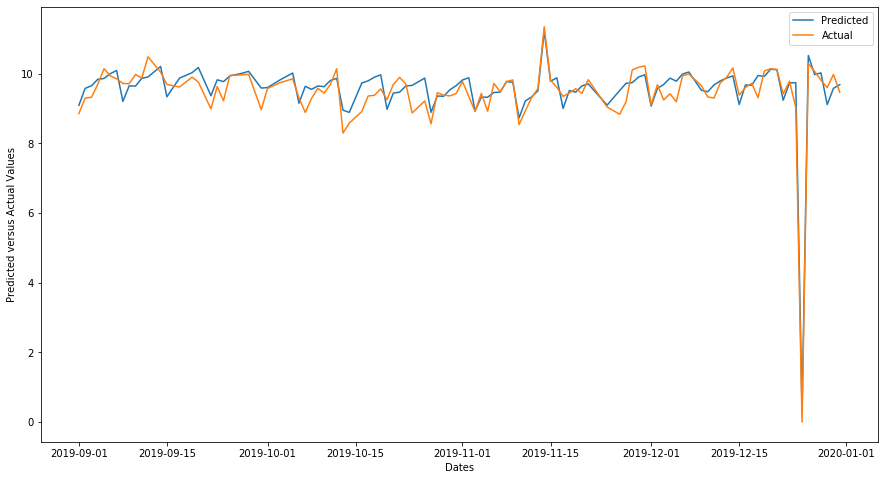

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====swift current=====
RMSE loss for swift current = 1.107


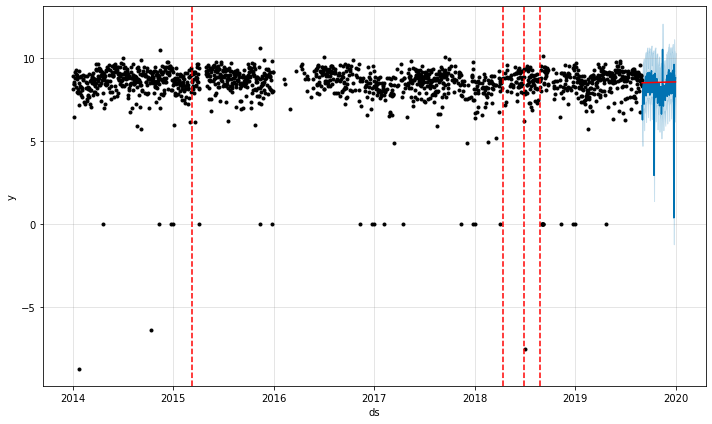

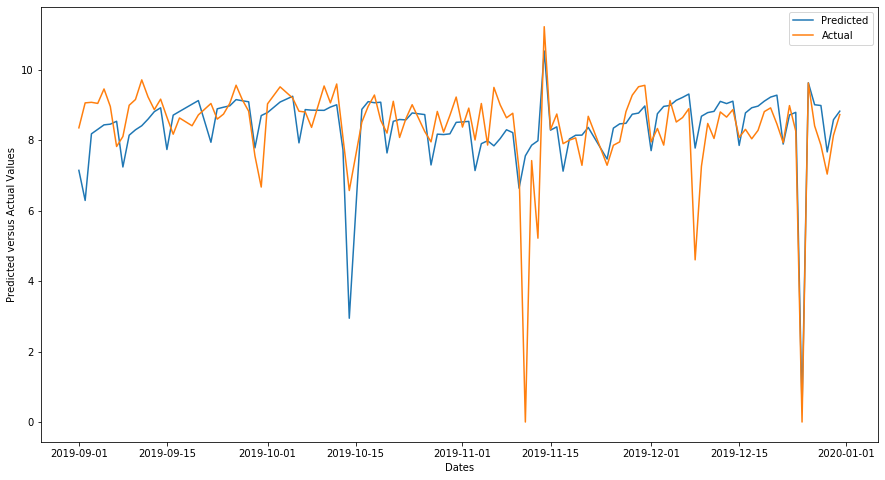

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====wainwright=====
RMSE loss for wainwright = 0.910


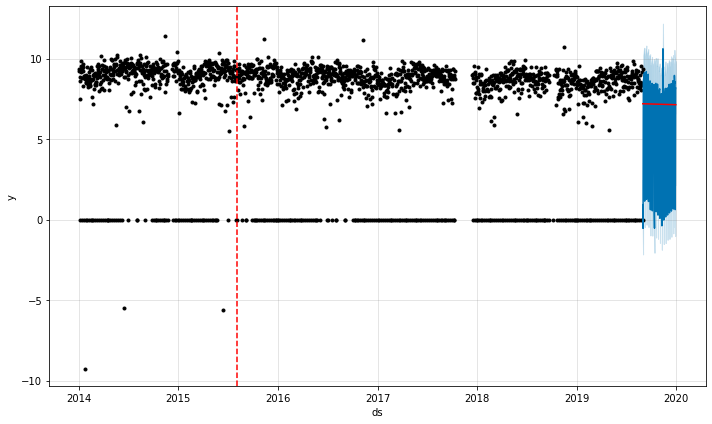

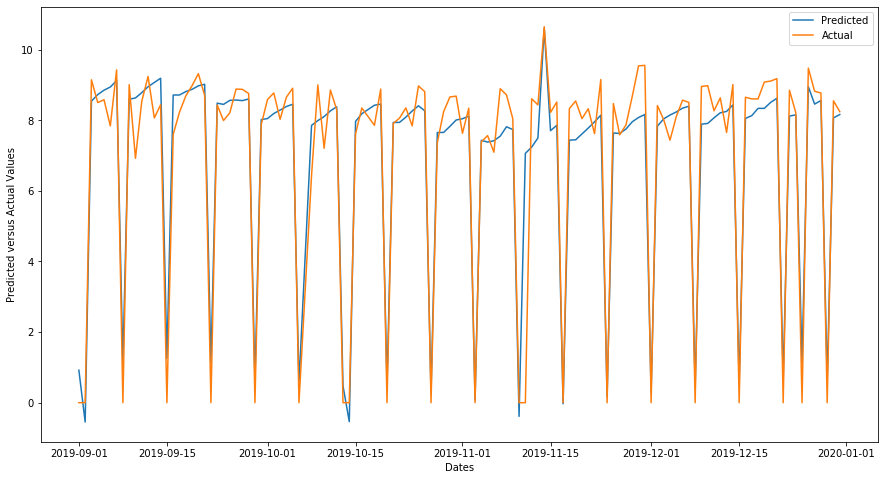

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====stettler=====
RMSE loss for stettler = 1.339


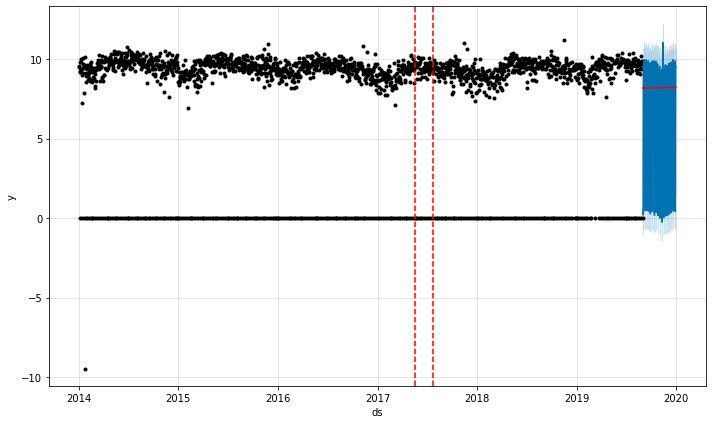

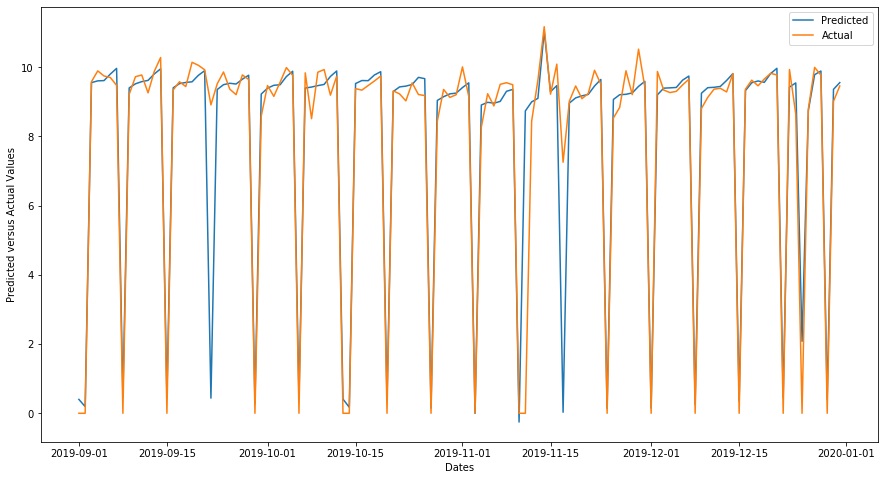

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


=====nelson=====
No records to test for nelson city
=====edmonton=====


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE loss for edmonton = 0.570


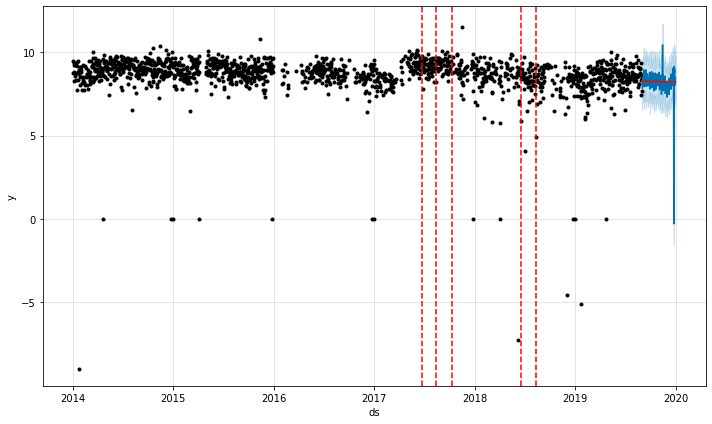

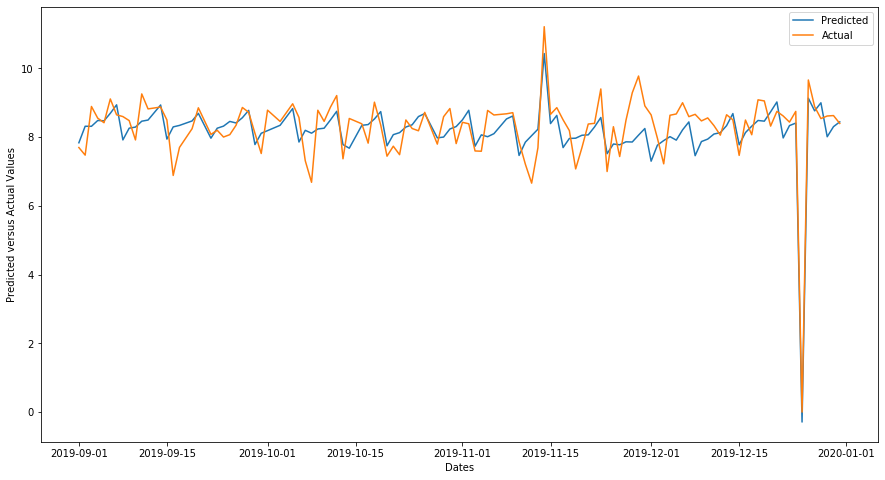

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====olds=====
RMSE loss for olds = 0.907


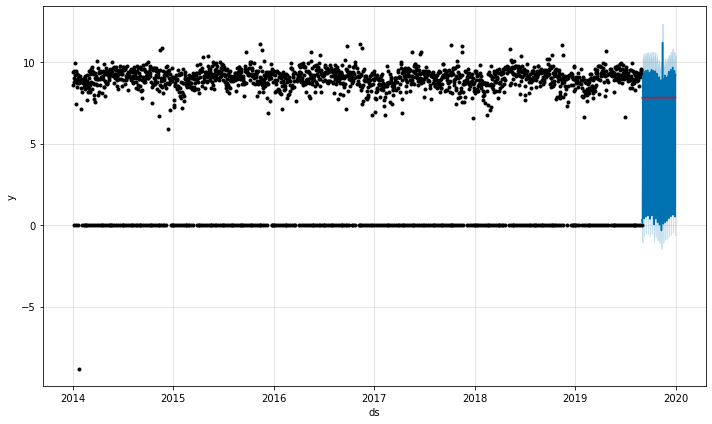

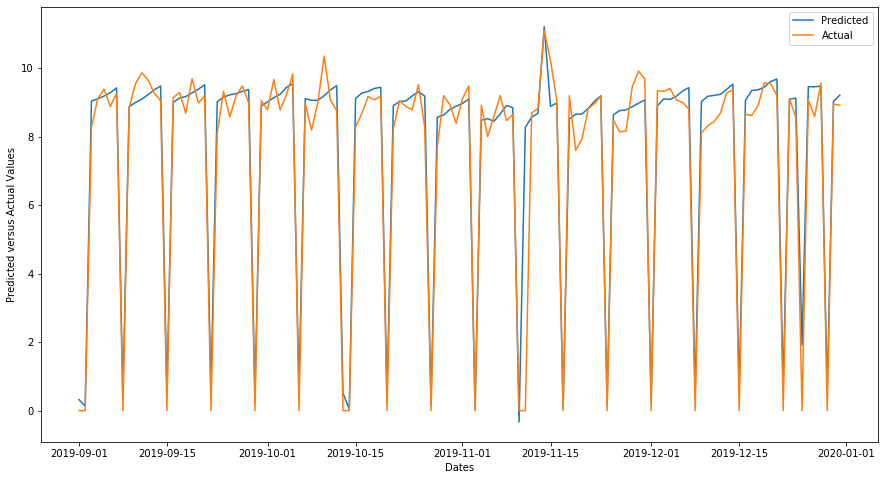

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====red deer=====
RMSE loss for red deer = 1.408


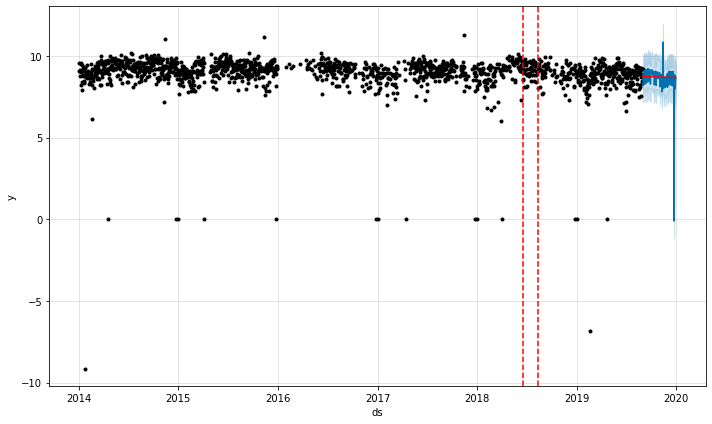

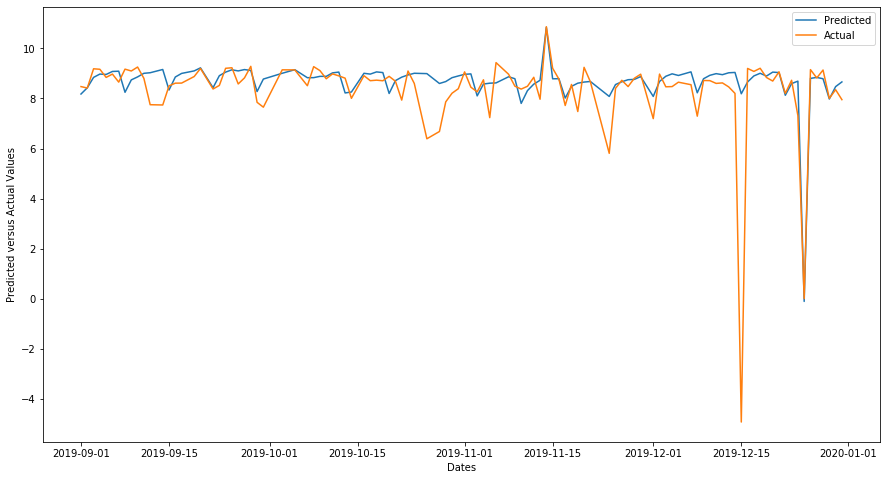

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====camrose=====
RMSE loss for camrose = 0.870


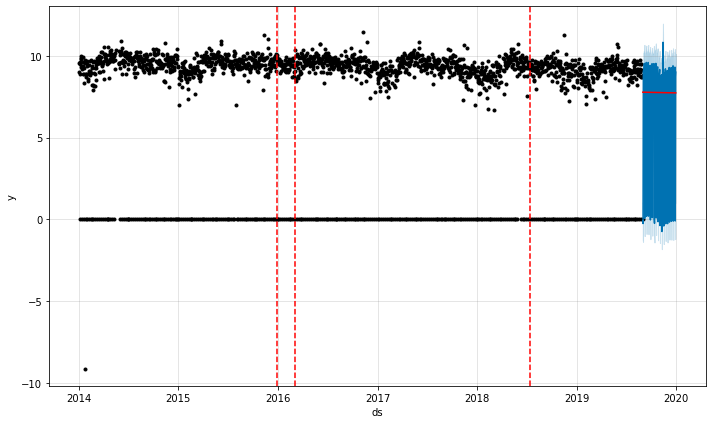

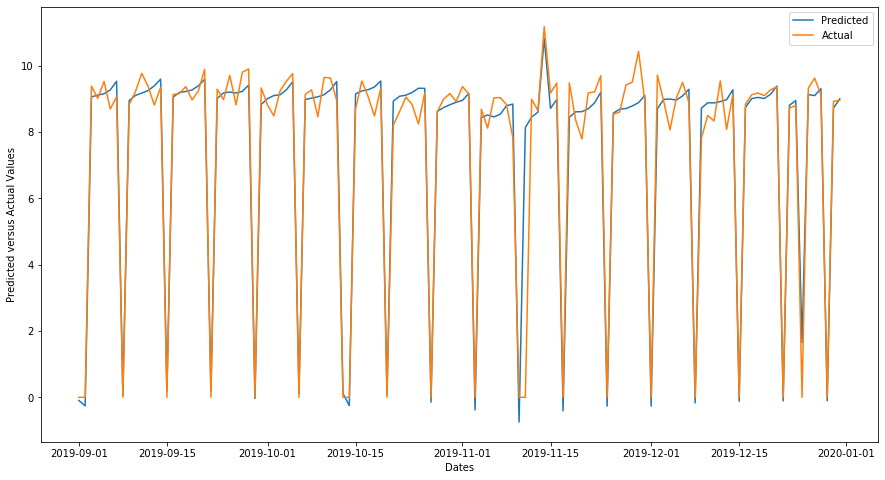

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====lethbridge=====
RMSE loss for lethbridge = 1.173


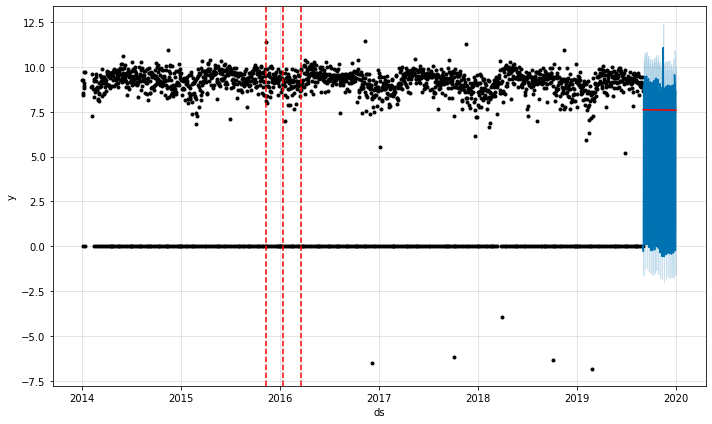

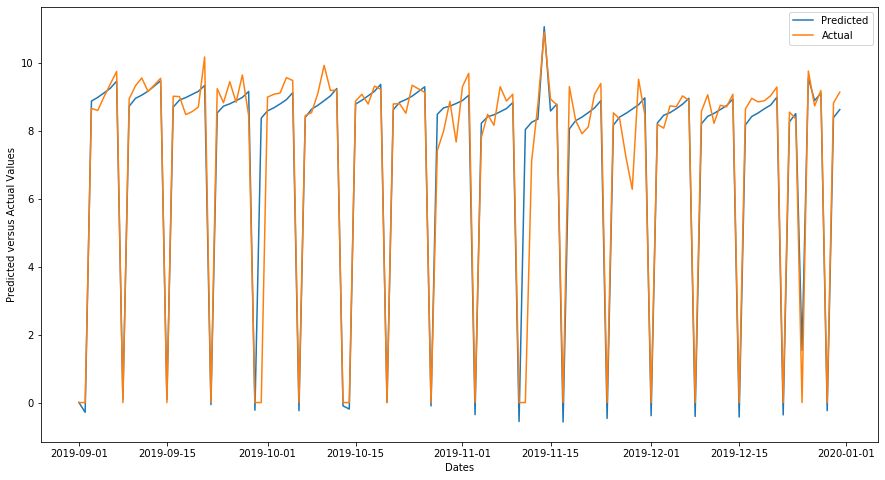

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


=====terrace=====
RMSE loss for terrace = 0.691


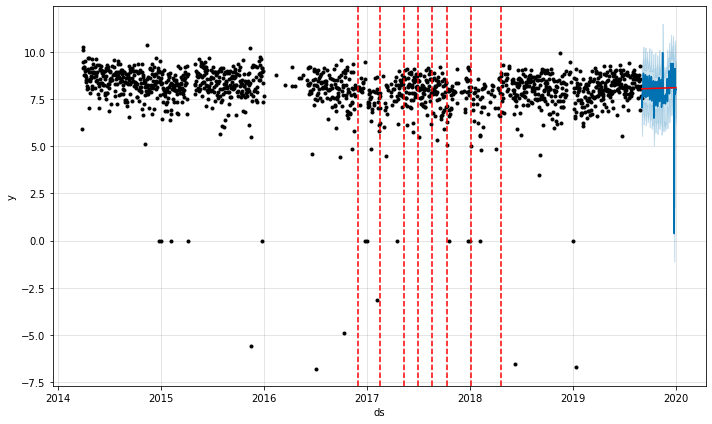

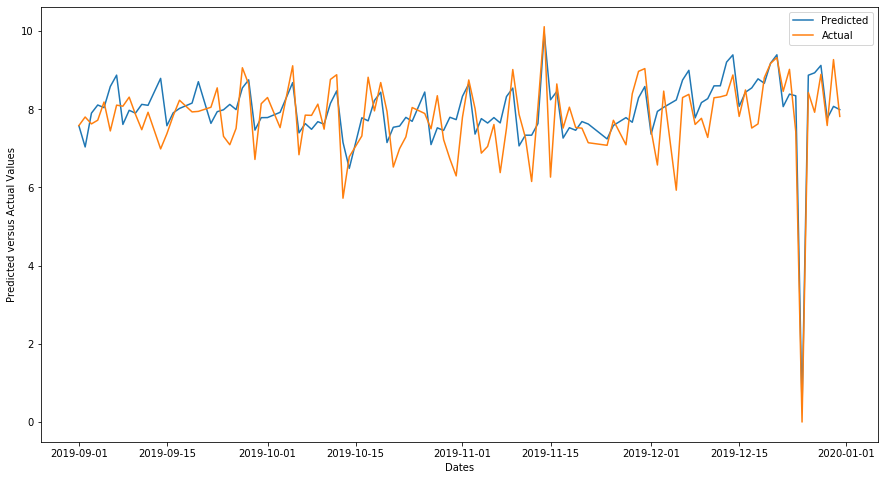

Overall Model Performance = 0.723


In [8]:
# load retail sales data
tr_data = load_data(datapath['train_data'], 'csv')
te_data = load_data(datapath['test_data'], 'csv')

cities = tr_data['city'].str.lower().unique()
losses = []

for city in cities:
    print("=====%s=====" %(city))
    train = tr_data.loc[tr_data['city']==city]
    test = te_data.loc[te_data['city']==city]
    
    filename = city.replace(' ','_')
    path = "model/sales_weather/"+filename+".pkl"
    
    # preprocessing
    train_df = preprocess(train, include_weather=1)
    test_df = preprocess(test, include_weather=1)
    
    # train the prophet
    reg = model(train_df, include_weather=1)
    save_model(reg, path)
 
    # forecast future
    if(test_df.shape[0]):
        future = forecast(reg, test_df)
    
        # evaluate the model performance
        loss = evaluate(future['yhat'], test_df['y'])
        losses.append(loss)
        print("RMSE loss for %s = %.3f" % (city, loss))

        prophet_plot = reg.plot(future)
        add_changepoints_to_plot(prophet_plot.gca(), reg, future)
        
        # plot performance - predicted versus actual
        fig = plot_error(test_df['ds'], future['yhat'], test_df['y'])
        fig.show()
    else:
        print("No records to test for %s city" %(city))
        
# overall model performance for all cities
avg_loss =  np.array(losses).mean()
print("Overall Model Performance = %.3f" %(avg_loss))